# Building dataframe


Import needed library for learning model

In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.ticker as mtick

Build dataframe for training set

In [20]:
data = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\TKUD_Projects\\heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Analysis 

## Check collumns and shapes in dataframe

In [3]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [226]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 315252 rows and 11 columns


## Describe some basic statistical values

In [227]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [1]:
data.columns

NameError: name 'data' is not defined

Get all columns that have missing values

In [265]:
data.columns[data.isna().any()].tolist()

[]

# Analysis

In [21]:
ana_data = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\TKUD_Projects\\heart_2020_cleaned.csv')
ana_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Gender

In [35]:
cat_cols = ana_data.select_dtypes('object').columns

In [36]:
list_col_cat = list(cat_cols)
list_col_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [37]:
list_col_cat = [element for element in list_col_cat if element not in ['Sex','AgeCategory','Race']]

In [39]:
list_col_cat = [element for element in list_col_cat if element in ana_data.select_dtypes('object').columns and element not in ['Sex','AgeCategory','Race'] ]

In [40]:
sex_gp = ana_data.groupby('Sex')['Race'].value_counts(normalize=True)*100

In [41]:
data_sex_gp = pd.DataFrame(sex_gp)
data_sex_gp.rename(columns={"Race":"Percentage"},inplace=True)

In [42]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

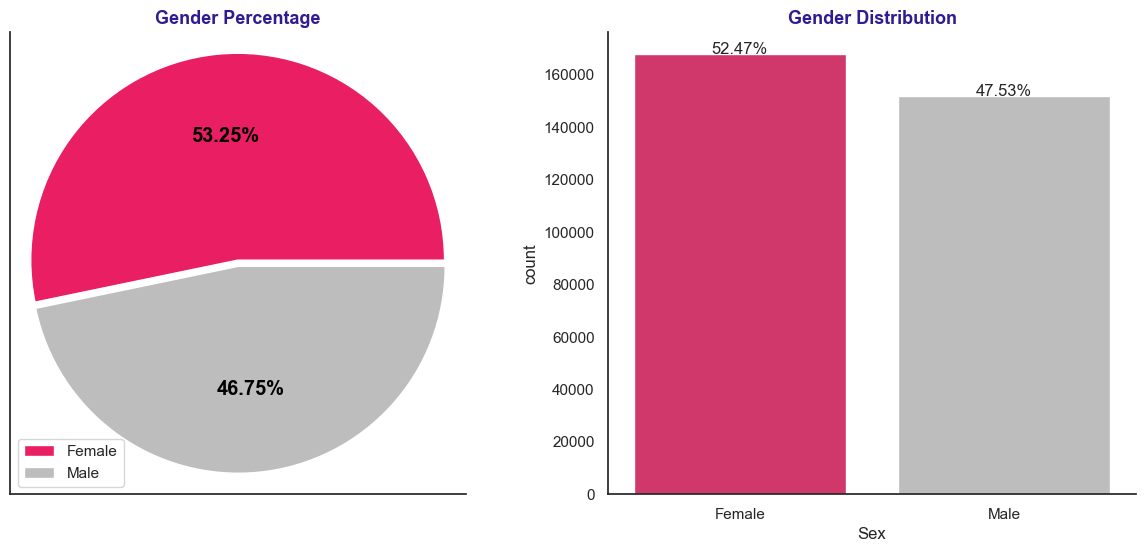

In [43]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), squeeze=True)

# Set the style to white
sns.set(style='white')

# Gender Percentage Pie Chart
ser = (data['Sex'].value_counts(normalize=True) * 100)
ser.plot(kind='pie', autopct='%.2f%%', textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'},
         colors=['#E91E63', '#BDBDBD'], explode=[0.01, 0.02], frame=True, ax=axs[0], labels=None)
axs[0].legend(ser.index)
axs[0].set_ylabel('')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].set_title('Gender Percentage', fontsize=13, fontweight='bold', loc='center', fontdict={'color': '#311B92'})
sns.despine()

# Gender Distribution Countplot
sns.countplot(data=ana_data, x='Sex', palette=['#E91E63', '#BDBDBD'], ax=axs[1])
axs[1].set_title('Gender Distribution', fontsize=13, fontweight='bold', loc='center',
                 fontdict={'color': '#311B92'})
percentage = list(ana_data['Sex'].value_counts(normalize=True).values * 100)
patches = axs[1].patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 0.05
    axs[1].annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

sns.despine()

HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
Diabetic
PhysicalActivity
GenHealth
Asthma


Text(0.5, 0.98, 'Details with respect to gender')

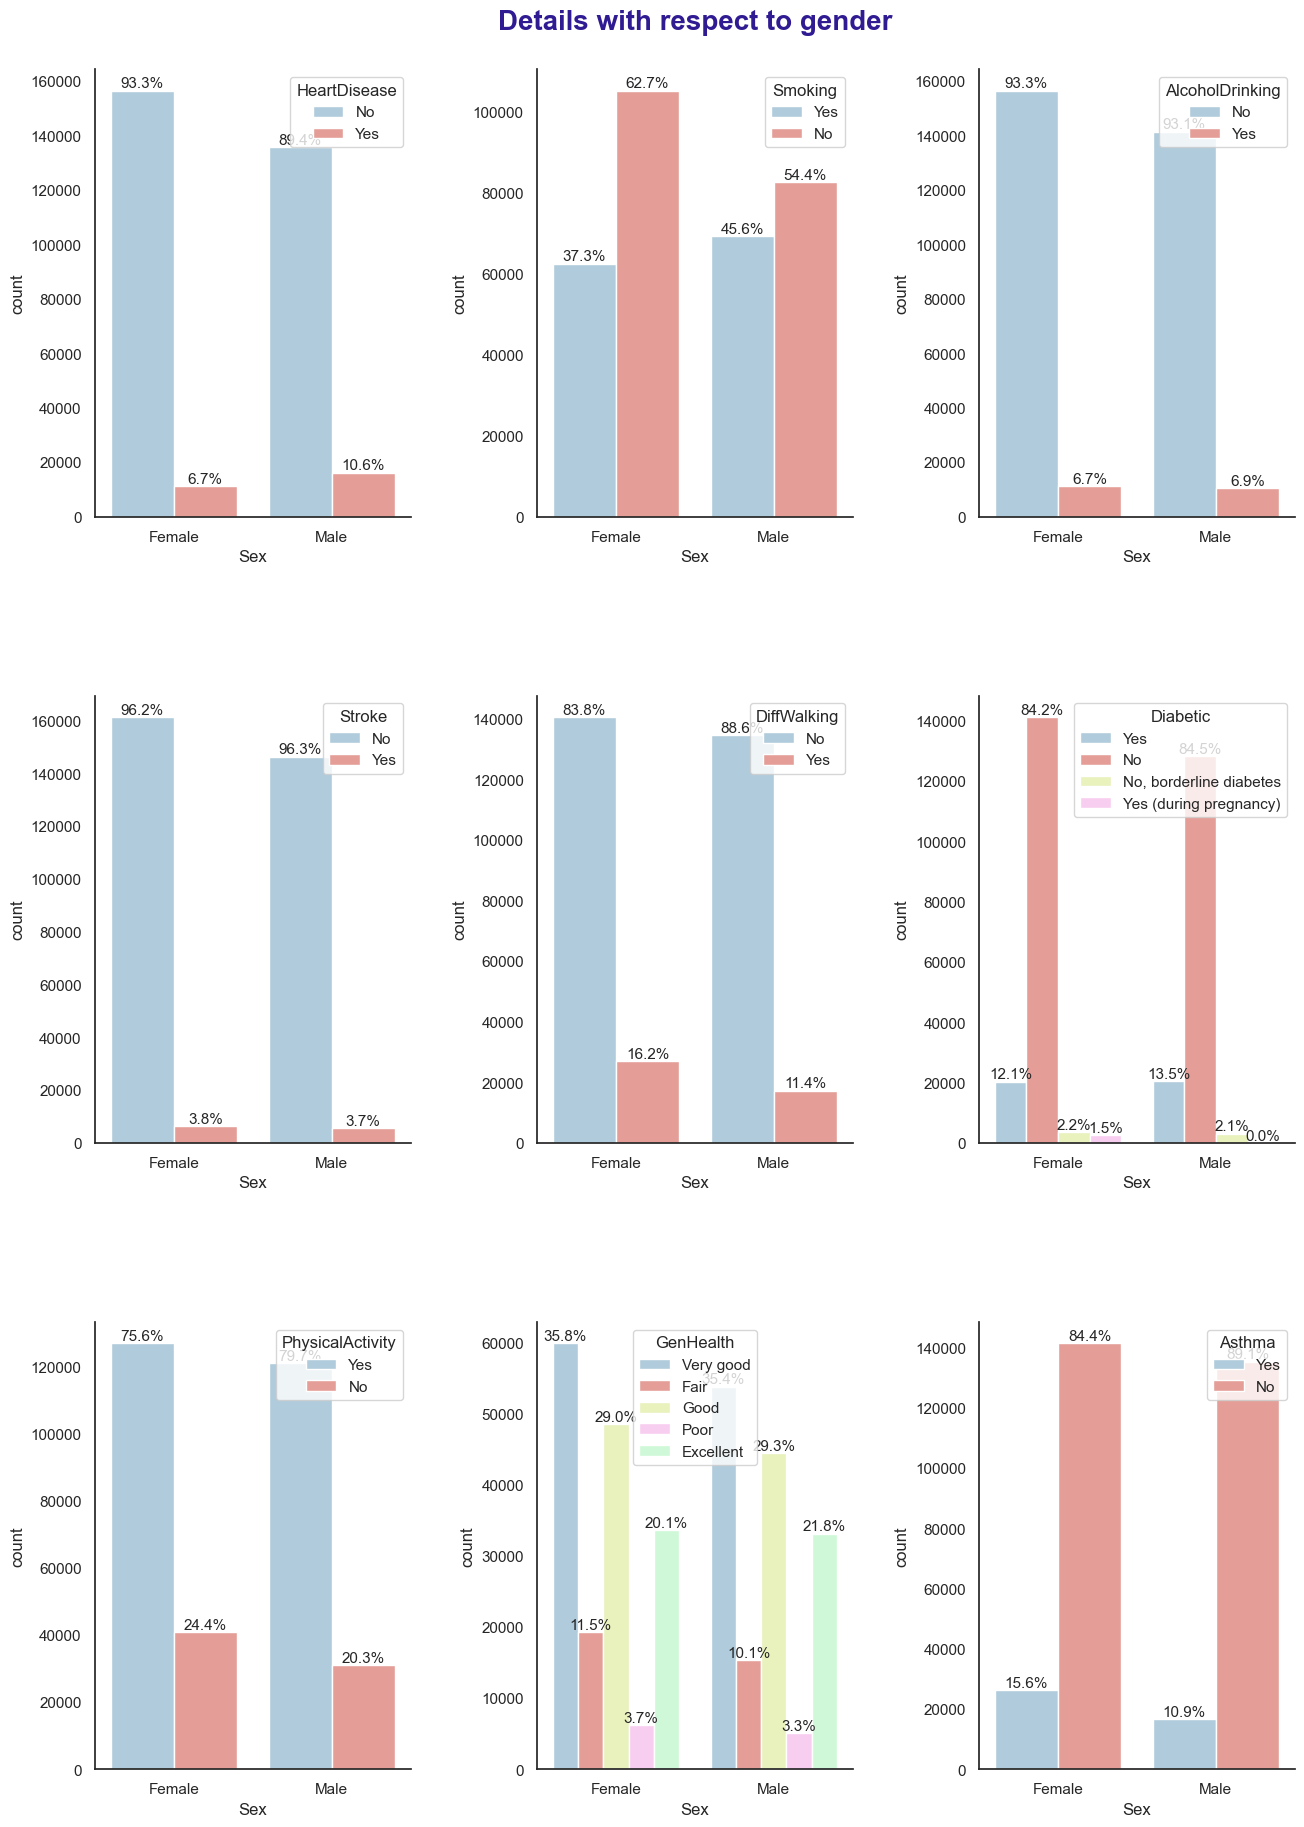

In [45]:
# Display the figure
plt.show()

# Additional code snippets
fig, axs = plt.subplots(3, 3, figsize=(15, 20), squeeze=False)
sns.set(style='white')
for axis, cat in zip(axs.ravel(), list_col_cat):
    ax = sns.countplot(x='Sex', hue=cat, data=ana_data, ax=axis, palette=['#A9CCE3', '#F1948A',"#effab4","#ffc7f4","#c7ffd3"])
    percentage_above_bar_relative_to_xgroup(ax)
    ax.legend(title=str(cat), loc='best')
    print(cat)
    sns.despine()

"""plt.figure(figsize=(10, 4))
ax = sns.barplot(x=data_sex_gp['Sex'], y=data_sex_gp['Percentage'], hue=data_sex_gp['Race'], palette='husl')
percentage_above_bar_relative_to_xgroup(ax)
ax.legend(loc='best')
sns.despine()"""

fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.95,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Details with respect to gender', fontweight='bold', fontdict={'color': '#311B92'}, fontsize=20)

#fig.show()

# Asthma

## Impact on people ages

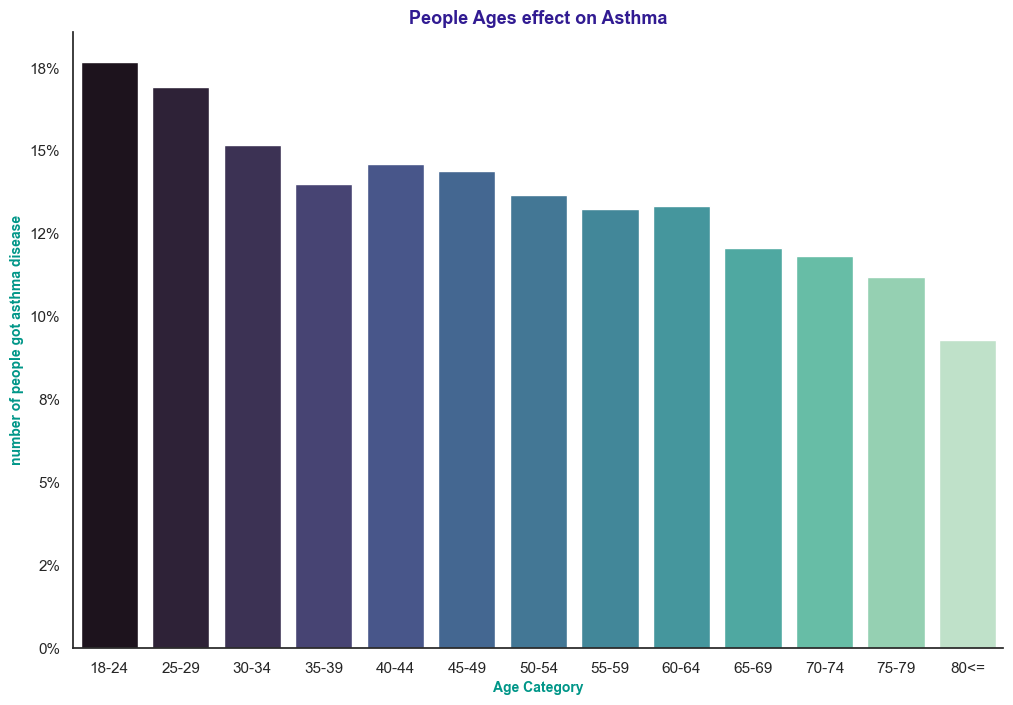

In [113]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['Asthma']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People Ages effect on Asthma', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Age Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people got asthma disease', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by PhysicalHealth

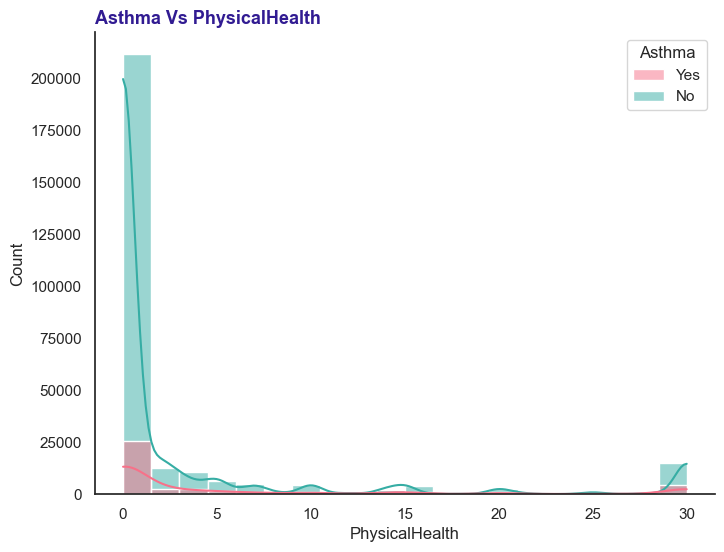

In [22]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['PhysicalHealth'],hue = data['Asthma'],bins=20,palette= 'husl',stat='count',multiple='layer',kde=True)
# plt.xticks()
plt.title('Asthma Vs PhysicalHealth',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()

In [26]:
from scipy.stats import ttest_ind

# Tách dữ liệu thành hai nhóm theo giá trị của biến Asthma và loại bỏ các giá trị thiếu
asthma_yes = data[data['Asthma'] == 'Yes']['PhysicalHealth'].dropna()
asthma_no = data[data['Asthma'] == 'No']['PhysicalHealth'].dropna()

# Thực hiện kiểm định Welch's t-test độc lập
test_result = ttest_ind(asthma_yes, asthma_no)

# In ra kết quả
print('Giá trị t =', test_result.statistic)
print('p-value =', test_result.pvalue)

# Đưa ra kết luận
if test_result.pvalue < 0.05:
    print('Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')
else:
    print('Không có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')

Giá trị t = 67.14481357770683
p-value = 0.0
Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.


## Impact by MentalHealth 

In [107]:
ana_data['Race']

0            White
1            White
2            White
3            White
4            White
            ...   
319790    Hispanic
319791    Hispanic
319792    Hispanic
319793    Hispanic
319794    Hispanic
Name: Race, Length: 319795, dtype: object

In [108]:
race_cnt=ana_data['Race'].value_counts()

In [109]:
race_dist = pd.DataFrame(race_cnt)

In [110]:
race_dist['percentage'] = race_dist['count'].apply(lambda x: round((x/race_dist['count'].sum())*100),2)

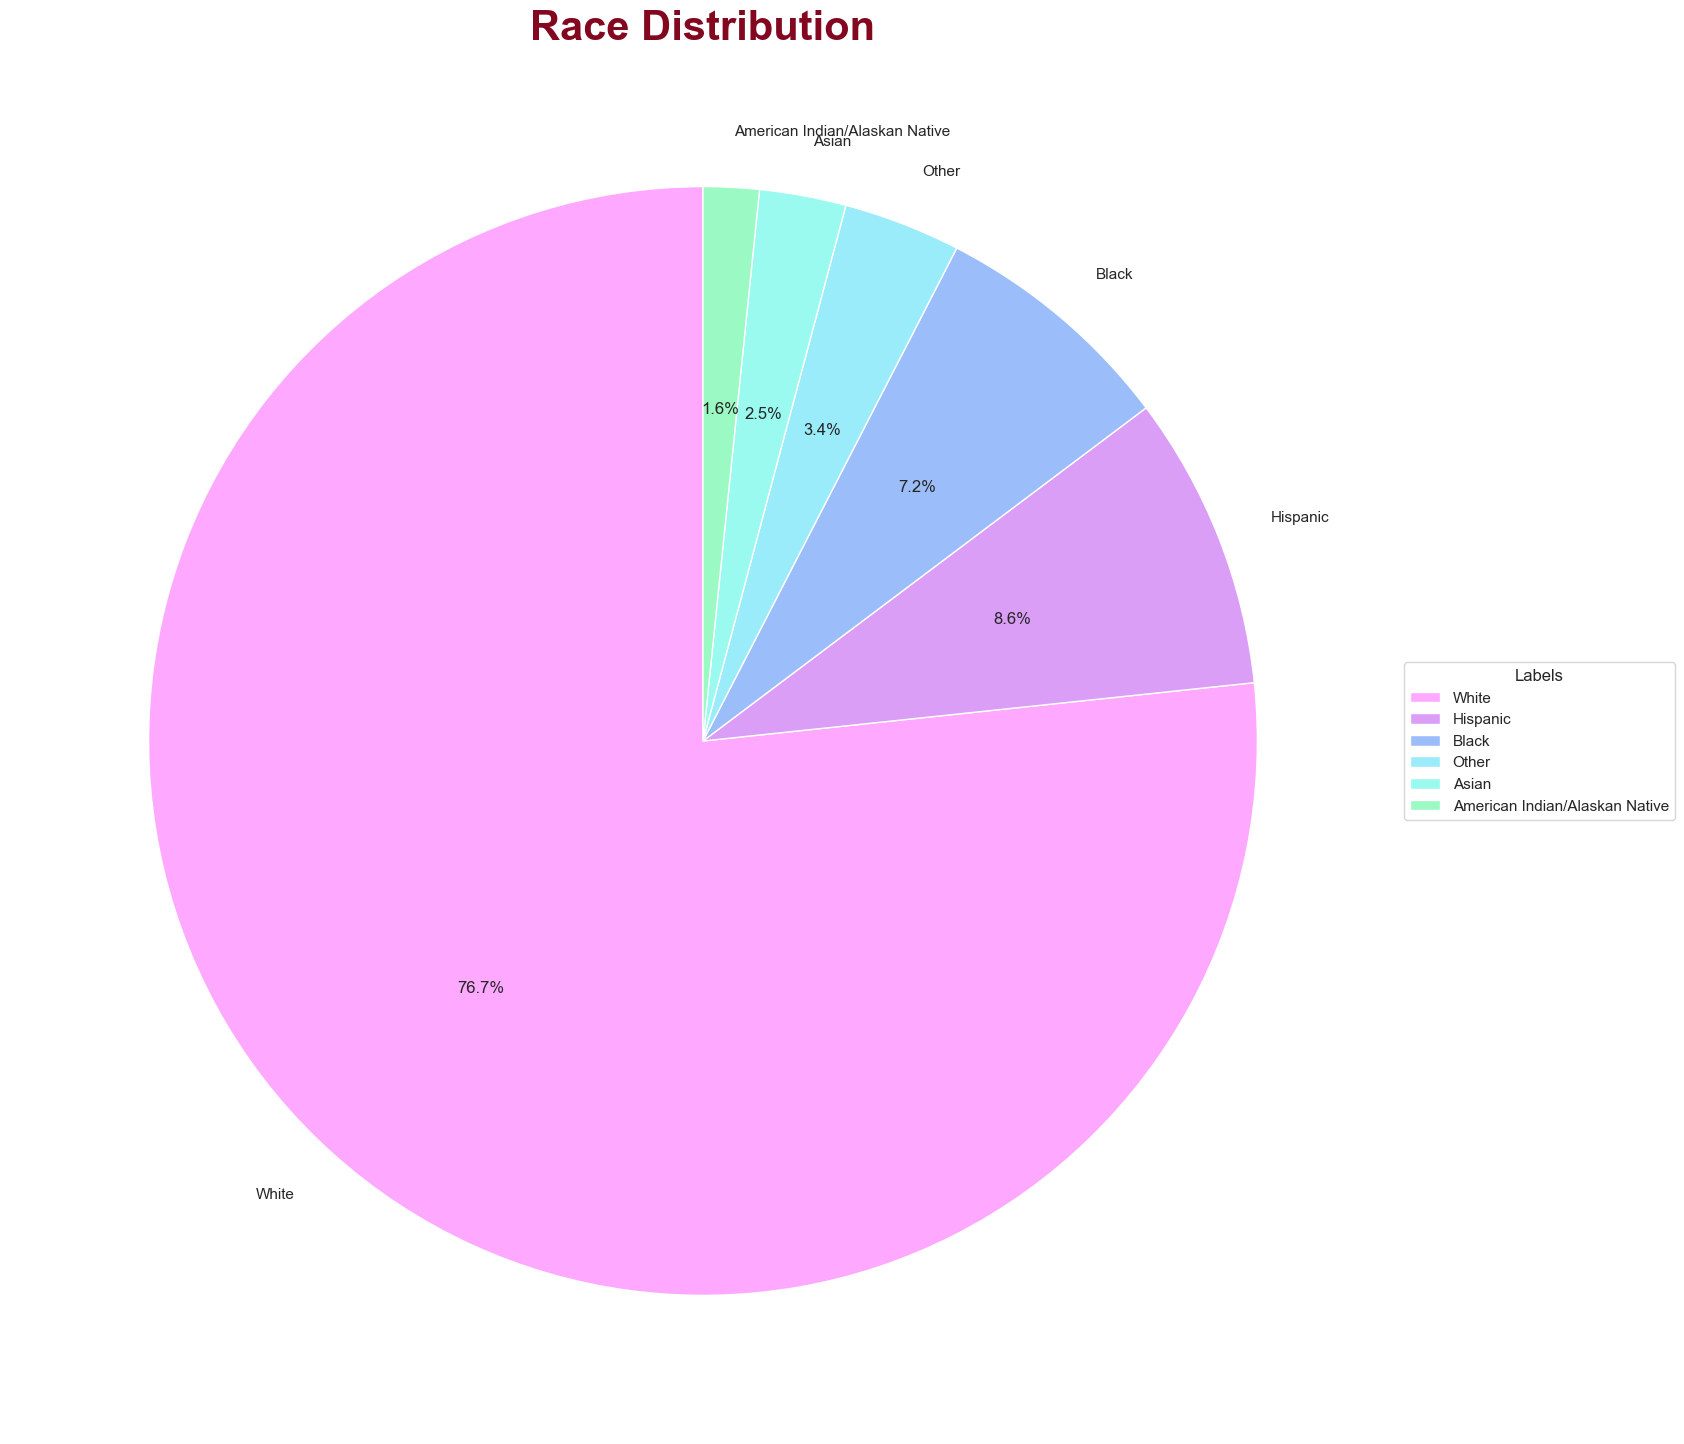

In [179]:
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(18,18))
ax.pie(race_dist['count'], labels=race_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('Race Distribution' ,loc='center', fontsize=30, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(race_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

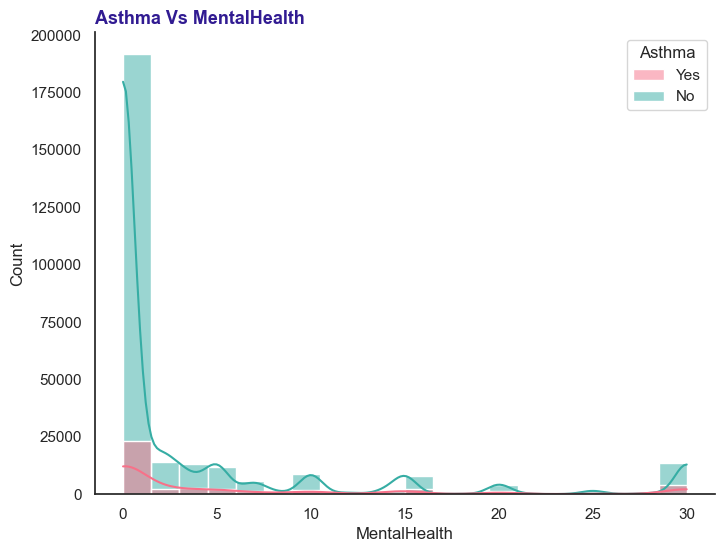

In [8]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['MentalHealth'],hue = data['Asthma'],bins=20,palette= 'husl',stat='count',multiple='layer',kde=True)
# plt.xticks()
plt.title('Asthma Vs MentalHealth',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()

In [29]:
from scipy.stats import ttest_ind

# Tách dữ liệu thành hai nhóm theo giá trị của biến Asthma và loại bỏ các giá trị thiếu
asthma_yes = data[data['Asthma'] == 'Yes']['MentalHealth'].dropna()
asthma_no = data[data['Asthma'] == 'No']['MentalHealth'].dropna()

# Thực hiện kiểm định Welch's t-test độc lập
test_result = ttest_ind(asthma_yes, asthma_no)

# In ra kết quả
print('Giá trị t =', test_result.statistic)
print('p-value =', test_result.pvalue)

# Đưa ra kết luận
if test_result.pvalue < 0.05:
    print('Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')
else:
    print('Không có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')

Giá trị t = 64.89502764778344
p-value = 0.0
Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.


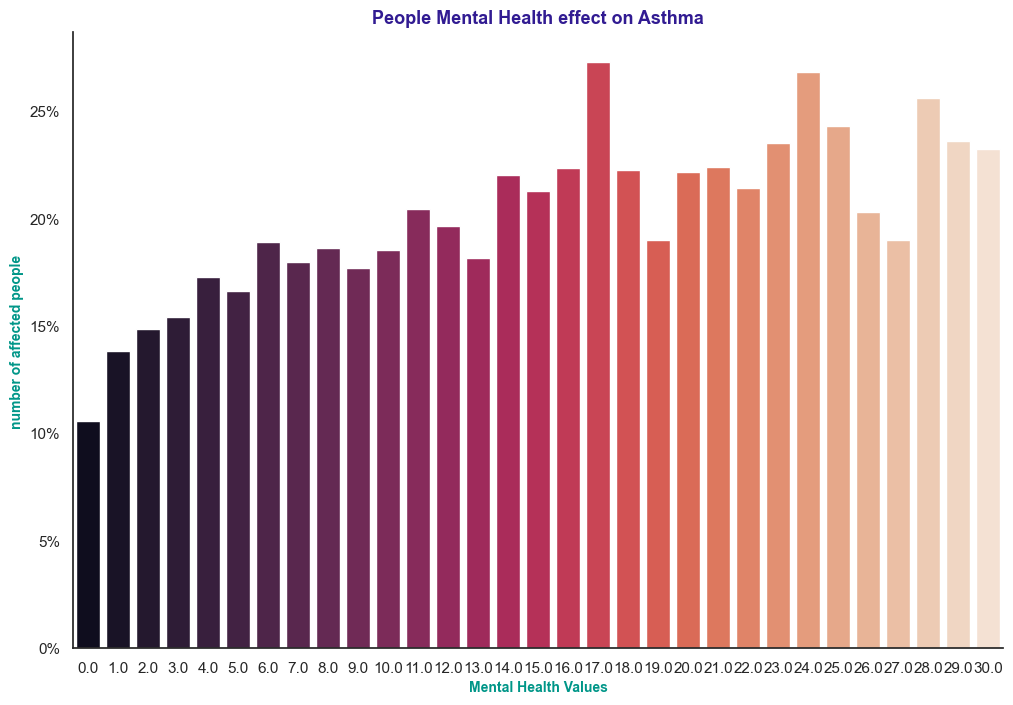

In [50]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'MentalHealth'
t = pd.DataFrame((ana_data[ana_data['Asthma']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='rocket')
total2 = t['count'].sum()
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_title('People Mental Health effect on Asthma', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Mental Health Values', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of affected people ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact on heart disease

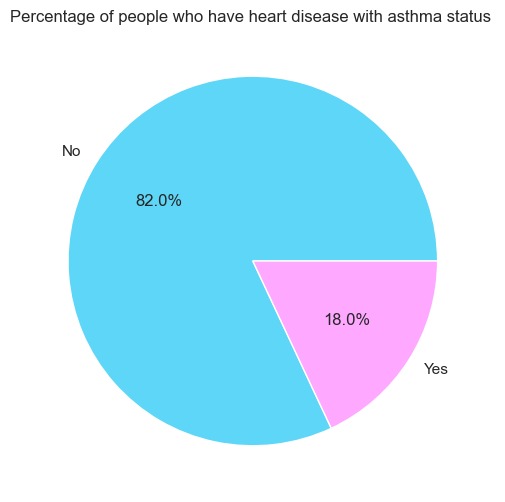

In [51]:
# Lọc dữ liệu với heart disease là yes
data = ana_data.loc[ana_data['HeartDisease'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['Asthma'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#5ed6f7','#fea8ff']
#sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of people who have heart disease with asthma status ')
plt.show()

# AlcoholDrinking

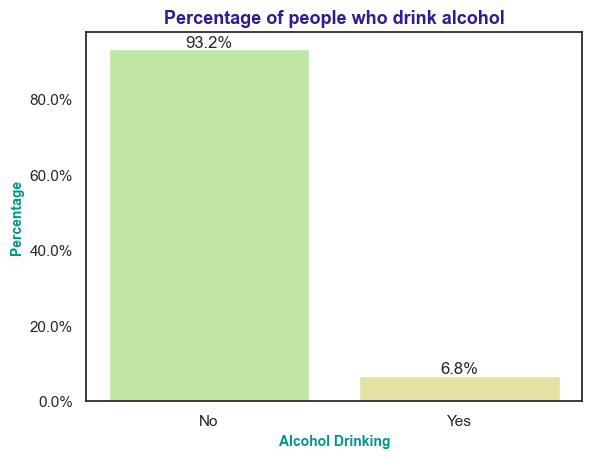

In [66]:
from matplotlib.ticker import FuncFormatter
counts = ana_data['AlcoholDrinking'].value_counts()
percentages = counts / len(ana_data) * 100

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bars = ax.bar(counts.index, percentages.values, color=['#bfe6a3', '#e6e1a3'])

# Gắn nhãn giá trị của mỗi cột
for bar, percent in zip(bars, percentages.values):
    ax.text(bar.get_x() + bar.get_width() / 2, percent + 0.5, f'{percent:.1f}%', ha='center')

# Đặt tiêu đề và nhãn cho biểu đồ
ax.set_title('Percentage of people who drink alcohol', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Alcohol Drinking', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('Percentage', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})

# Định dạng trục y để hiển thị phần trăm
def format_percent(x, pos):
    return '{:,.1f}%'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(format_percent))

# Hiển thị biểu đồ
plt.show()

## Impact by Smoking

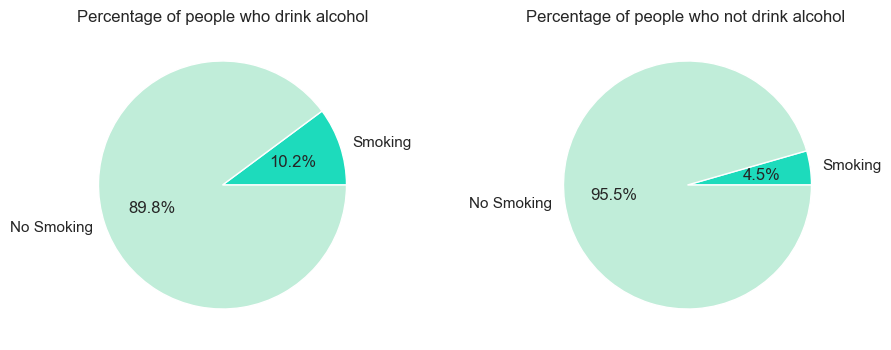

In [52]:
# Tính toán số lượng người trong các nhóm tương ứng
diffWalking_counts = ana_data['Smoking'].value_counts()
diffWalking_kidney_counts = ana_data.groupby(['Smoking', 'AlcoholDrinking'])['AgeCategory'].count()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
kidney_percent = diffWalking_kidney_counts.loc[('Yes', 'Yes')] / diffWalking_counts.loc['Yes'] * 100
not_gotkidney_percent = diffWalking_kidney_counts.loc[('Yes', 'No')] / diffWalking_counts.loc['Yes'] * 100

# Tính toán phần trăm những người không hoạt động có hút thuốc và không hút thuốc
inactive_smoker_percent = diffWalking_kidney_counts.loc[('No', 'Yes')] / diffWalking_counts.loc['No'] * 100
inactive_non_smoker_percent = diffWalking_kidney_counts.loc[('No', 'No')] / diffWalking_counts.loc['No'] * 100

# Vẽ biểu đồ tròn
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
# Biểu đồ tròn cho phần trăm những người hoạt động có hút thuốc và không hút thuốc
labels = ['Smoking', 'No Smoking']
sizes = [kidney_percent, not_gotkidney_percent]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#1ddbbc','#c0edd9'])
axs[0].set_title('Percentage of people who drink alcohol')

# Biểu đồ tròn cho phần trăm những người không hoạt động có hút thuốc và không hút thuốc
labels = ['Smoking', 'No Smoking']
sizes = [inactive_smoker_percent, inactive_non_smoker_percent]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#1ddbbc','#c0edd9'])
axs[1].set_title('Percentage of people who not drink alcohol ')

plt.show()

## Impact on heart disease

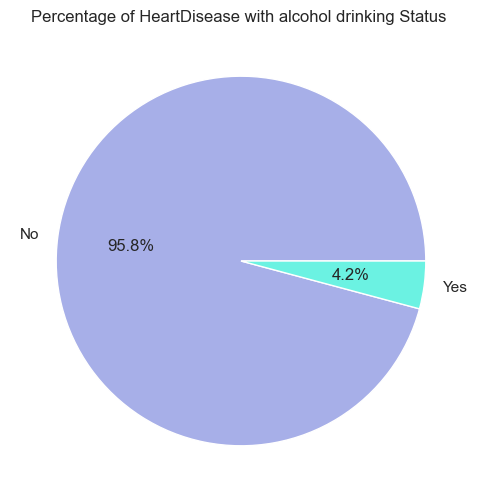

In [10]:
data = ana_data.loc[ana_data['HeartDisease'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['AlcoholDrinking'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#a7afe8', '#6bf2e2']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of HeartDisease with alcohol drinking Status ')
plt.show()

# Smoking

## Impact by Age

In [10]:
ana_data['AgeCategory'] = ana_data['AgeCategory'].replace('80 or older','80<=')

In [11]:
ser=ana_data['AgeCategory'].value_counts()

In [12]:
age_dist = pd.DataFrame(ser)

In [13]:
age_dist['percentage'] = age_dist['count'].apply(lambda x: round((x/age_dist['count'].sum())*100),2)

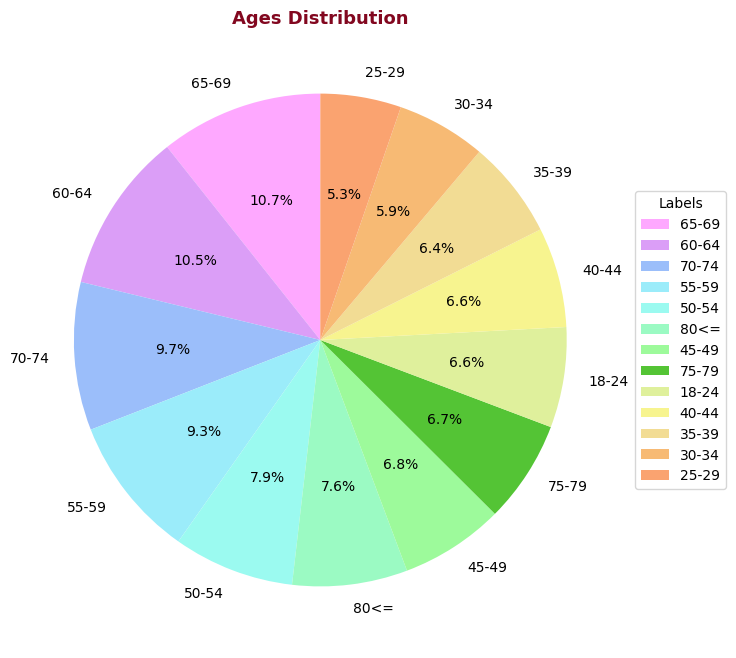

In [14]:
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(age_dist['count'], labels=age_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('Ages Distribution' ,loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(age_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

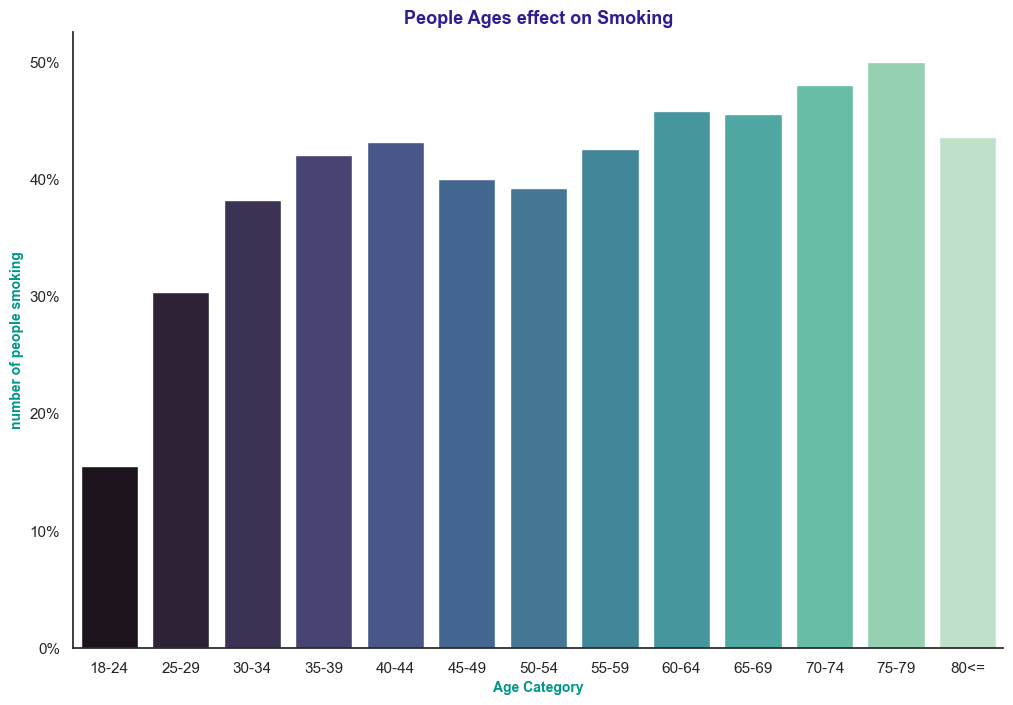

In [110]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['Smoking']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People Ages effect on Smoking', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Age Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people smoking', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by Physical Health

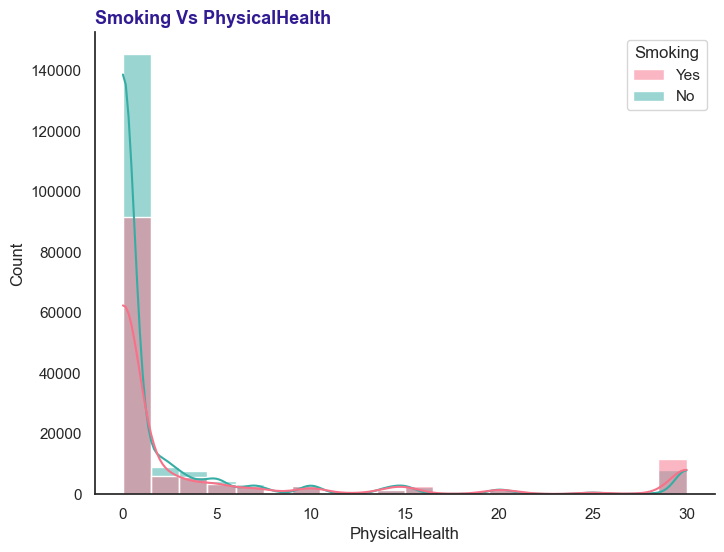

In [30]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['PhysicalHealth'],hue = data['Smoking'],bins=20,palette= 'husl',stat='count',multiple='layer',kde=True)
# plt.xticks()
plt.title('Smoking Vs PhysicalHealth',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()

In [18]:
from scipy.stats import ttest_ind

# Tách dữ liệu thành hai nhóm theo giá trị của biến Asthma và loại bỏ các giá trị thiếu
asthma_yes = ana_data[ana_data['Smoking'] == 'Yes']['PhysicalHealth'].dropna()
asthma_no = ana_data[ana_data['Smoking'] == 'No']['PhysicalHealth'].dropna()

# Thực hiện kiểm định Welch's t-test độc lập
test_result = ttest_ind(asthma_yes, asthma_no  ,equal_var=False)

# In ra kết quả
print('Giá trị t =', test_result.statistic)
print('p-value =', test_result.pvalue)

# Đưa ra kết luận
if test_result.pvalue < 0.05:
    print('Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')
else:
    print('Không có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')

Giá trị t = 62.536349426983904
p-value = 0.0
Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.


In [49]:
# Chọn giá trị p[c] và kích thước mẫu chuẩn hóa
pc = 0.01
c = 319795/25

# Tách dữ liệu thành hai nhóm theo giá trị của biến Asthma và loại bỏ các giá trị thiếu
asthma_yes = data[data['Smoking'] == 'Yes']['PhysicalHealth'].dropna()
asthma_no = data[data['Smoking'] == 'No']['PhysicalHealth'].dropna()

# Thực hiện kiểm định Welch's t-test độc lập
test_result = ttest_ind(asthma_yes, asthma_no)

# Tính p-value chuẩn hóa
p_std = pc * np.sqrt(c/len(asthma_yes))

# In ra kết quả
print('Giá trị t =', test_result.statistic)
print('p-value =', test_result.pvalue)
print('p-value chuẩn hóa =', p_std)

# Đưa ra kết luận
if p_std < 0.05:
    print('Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')
else:
    print('Không có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')

Giá trị t = 65.67044507727725
p-value = 0.0
p-value chuẩn hóa = 0.003114083565169645
Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.


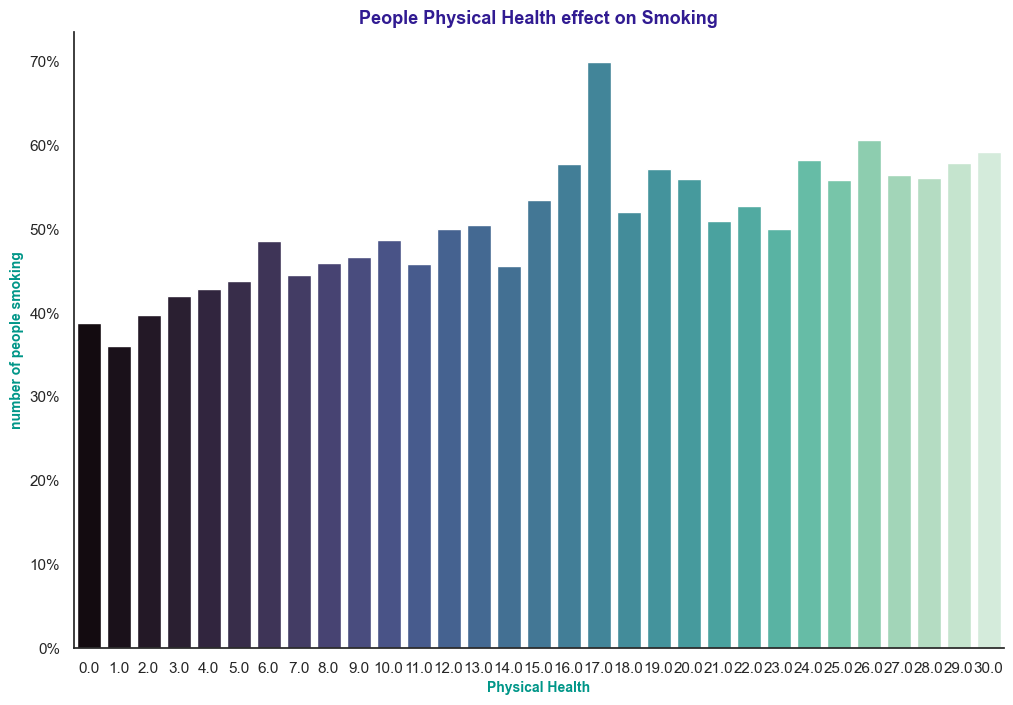

In [107]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'PhysicalHealth'
t = pd.DataFrame((ana_data[ana_data['Smoking']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
total2 = t['count'].sum()
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_title('People Physical Health effect on Smoking', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Physical Health', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people smoking', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by difficult walking 

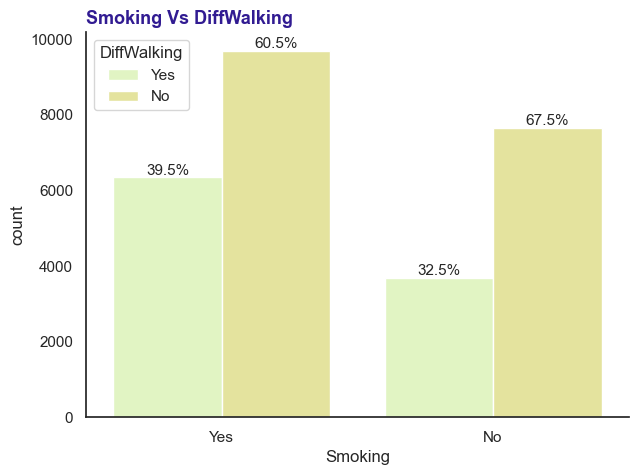

In [104]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Smoking', hue='DiffWalking', data=data, palette=['#e3fcbb','#f0ee92'])
percentage_above_bar_relative_to_xgroup(ax)
# ax.legend(loc='best')
plt.legend(loc='upper left',title='DiffWalking')
plt.title('Smoking Vs DiffWalking',fontsize=13,fontweight='bold',loc='left',fontdict={'color':'#311B92'})
sns.despine()

## Impact on heart disease

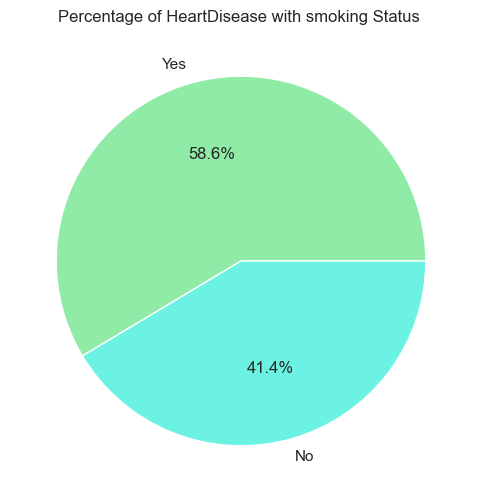

In [39]:
data = ana_data.loc[ana_data['HeartDisease'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['Smoking'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#8feba6', '#6bf2e2']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of HeartDisease with smoking Status ')
plt.show()

# BMI

In [13]:
ana_data['BMI Category'] = ana_data['BMI'].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if 18.5 <= x < 25 else ('Overweight' if 25 <= x < 30 else ('Obese' if 30 <= x < 35 else ('Severely Obese' if 35 <= x < 40 else ('Morbidly Obese'))))))

In [14]:
ana_data['BMI Category']

0            Underweight
1                 Normal
2             Overweight
3                 Normal
4                 Normal
               ...      
319790        Overweight
319791        Overweight
319792            Normal
319793             Obese
319794    Morbidly Obese
Name: BMI Category, Length: 319795, dtype: object

In [15]:
bc_cnt=ana_data['BMI Category'].value_counts()

In [19]:
bc_dist = pd.DataFrame(bc_cnt)

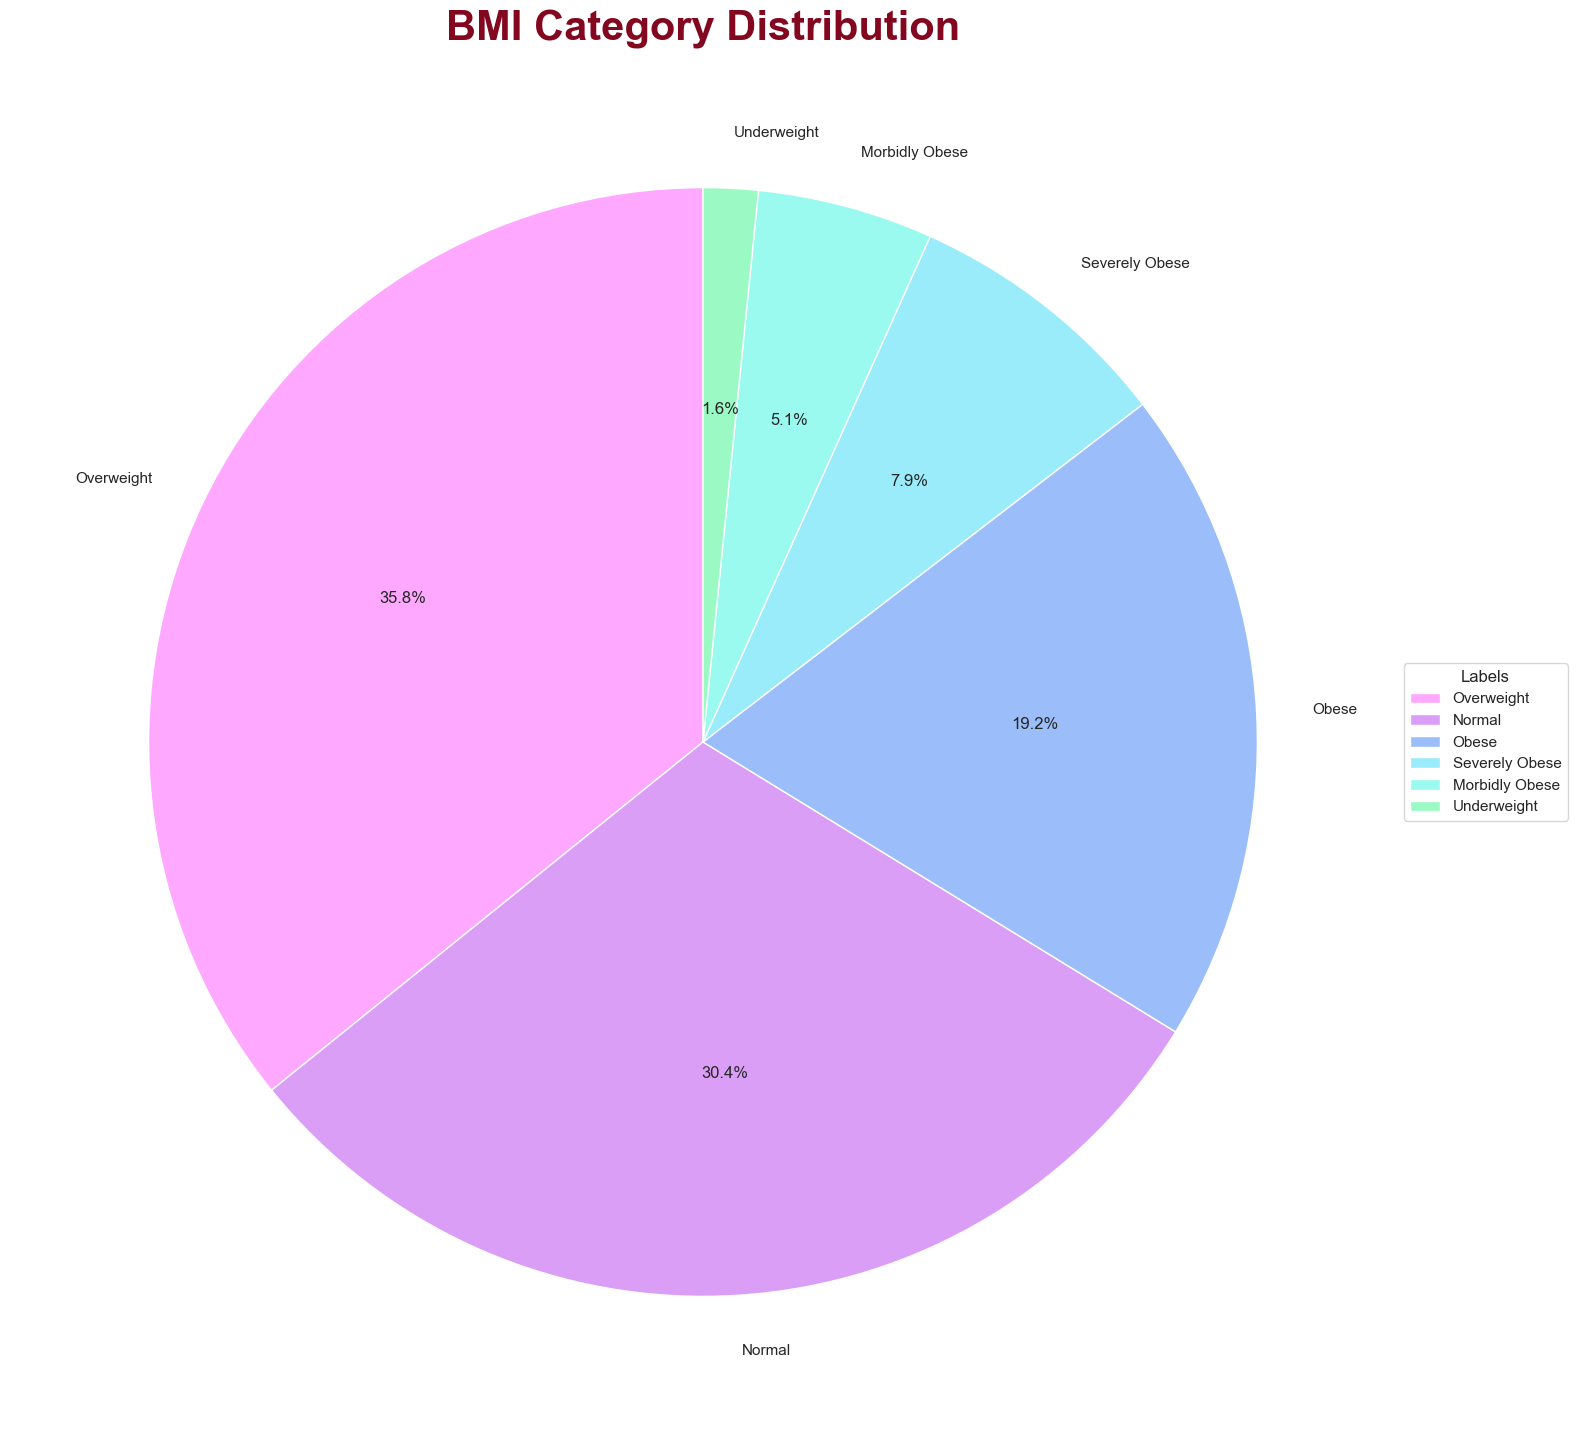

In [23]:
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(18,18))
ax.pie(bc_dist['count'], labels=bc_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('BMI Category Distribution' ,loc='center', fontsize=30, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(bc_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

## Impact on heart disease

In [39]:
yes_data = ana_data[ana_data['HeartDisease'] == 'Yes']
no_data = ana_data[ana_data['HeartDisease'] == 'No']

In [40]:
yes_counts = yes_data['BMI Category'].value_counts()
no_counts = no_data['BMI Category'].value_counts()

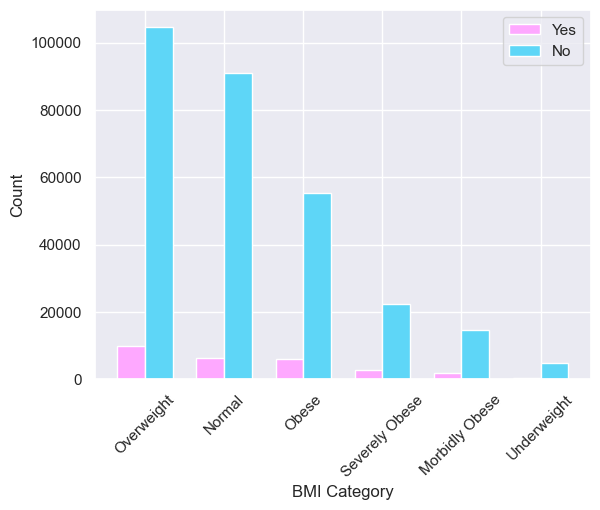

In [41]:
bar_width = 0.35



index = np.arange(len(yes_counts.index))

plt.bar(index, yes_counts.values, bar_width,  color='#fea8ff', label='Yes')
plt.bar(index + bar_width, no_counts.values, bar_width,  color='#5ed6f7', label='No')
plt.xticks(index + bar_width / 2, yes_counts.index)
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

bmi not affect so much on heart disease

## Impact by BMI

In [13]:
yes_data = ana_data[ana_data['PhysicalActivity'] == 'Yes']
no_data = ana_data[ana_data['PhysicalActivity'] == 'No']


In [14]:
yes_counts = yes_data['BMI Category'].value_counts()
no_counts = no_data['BMI Category'].value_counts()

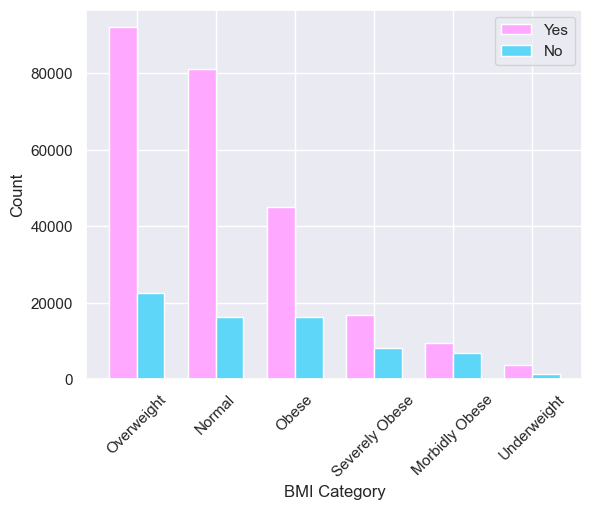

In [24]:
bar_width = 0.35



index = np.arange(len(yes_counts.index))

plt.bar(index, yes_counts.values, bar_width,  color='#fea8ff', label='Yes')
plt.bar(index + bar_width, no_counts.values, bar_width,  color='#5ed6f7', label='No')
plt.xticks(index + bar_width / 2, yes_counts.index)
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

## Impact by using drugs

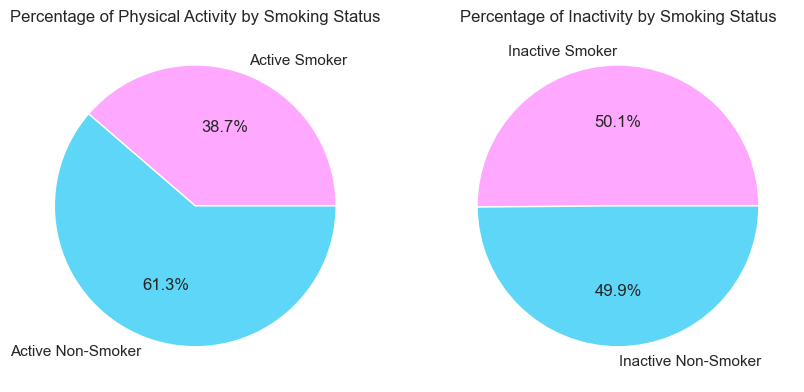

In [37]:

# Tính toán số lượng người trong các nhóm tương ứng
diffWalking_counts = ana_data['PhysicalActivity'].value_counts()
diffWalking_kidney_counts = ana_data.groupby(['PhysicalActivity', 'Smoking'])['AgeCategory'].count()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
kidney_percent = diffWalking_kidney_counts.loc[('Yes', 'Yes')] / diffWalking_counts.loc['Yes'] * 100
not_gotkidney_percent = diffWalking_kidney_counts.loc[('Yes', 'No')] / diffWalking_counts.loc['Yes'] * 100

# Tính toán phần trăm những người không hoạt động có hút thuốc và không hút thuốc
inactive_smoker_percent = diffWalking_kidney_counts.loc[('No', 'Yes')] / diffWalking_counts.loc['No'] * 100
inactive_non_smoker_percent = diffWalking_kidney_counts.loc[('No', 'No')] / diffWalking_counts.loc['No'] * 100

# Vẽ biểu đồ tròn
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ tròn cho phần trăm những người hoạt động có hút thuốc và không hút thuốc
labels = ['Active Smoker', 'Active Non-Smoker']
sizes = [kidney_percent, not_gotkidney_percent]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#fea8ff','#5ed6f7'])
axs[0].set_title('Percentage of Physical Activity by Smoking Status')

# Biểu đồ tròn cho phần trăm những người không hoạt động có hút thuốc và không hút thuốc
labels = ['Inactive Smoker', 'Inactive Non-Smoker']
sizes = [inactive_smoker_percent, inactive_non_smoker_percent]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#fea8ff','#5ed6f7'])
axs[1].set_title('Percentage of Inactivity by Smoking Status')

plt.show()

people who smoking tend not do activity

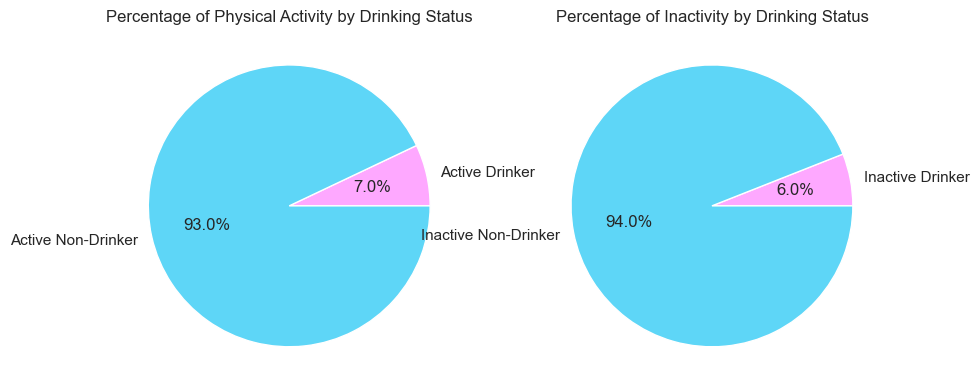

In [38]:
# Tính toán số lượng người trong các nhóm tương ứng
diffWalking_counts = ana_data['PhysicalActivity'].value_counts()
physical_activity_drinker_counts = ana_data.groupby(['PhysicalActivity', 'AlcoholDrinking'])['AgeCategory'].count()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
active_drinker_percent = physical_activity_drinker_counts.loc[('Yes', 'Yes')] / diffWalking_counts.loc['Yes'] * 100
active_non_drinker_percent = physical_activity_drinker_counts.loc[('Yes', 'No')] / diffWalking_counts.loc['Yes'] * 100

# Tính toán phần trăm những người không hoạt động có hút thuốc và không hút thuốc
inactive_drinker_percent = physical_activity_drinker_counts.loc[('No', 'Yes')] / diffWalking_counts.loc['No'] * 100
inactive_non_drinker_percent = physical_activity_drinker_counts.loc[('No', 'No')] / diffWalking_counts.loc['No'] * 100

# Vẽ biểu đồ tròn
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ tròn cho phần trăm những người hoạt động có hút thuốc và không hút thuốc
labels = ['Active Drinker', 'Active Non-Drinker']
sizes = [active_drinker_percent, active_non_drinker_percent]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#fea8ff','#5ed6f7'])
axs[0].set_title('Percentage of Physical Activity by Drinking Status')

# Biểu đồ tròn cho phần trăm những người không hoạt động có hút thuốc và không hút thuốc
labels = ['Inactive Drinker', 'Inactive Non-Drinker']
sizes = [inactive_drinker_percent, inactive_non_drinker_percent]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#fea8ff','#5ed6f7'])
axs[1].set_title('Percentage of Inactivity by Drinking Status')

plt.show()

Whether you drink alcohol or not, it doesn't affect physical activity too much


# Diabetic

## Impact by physical health

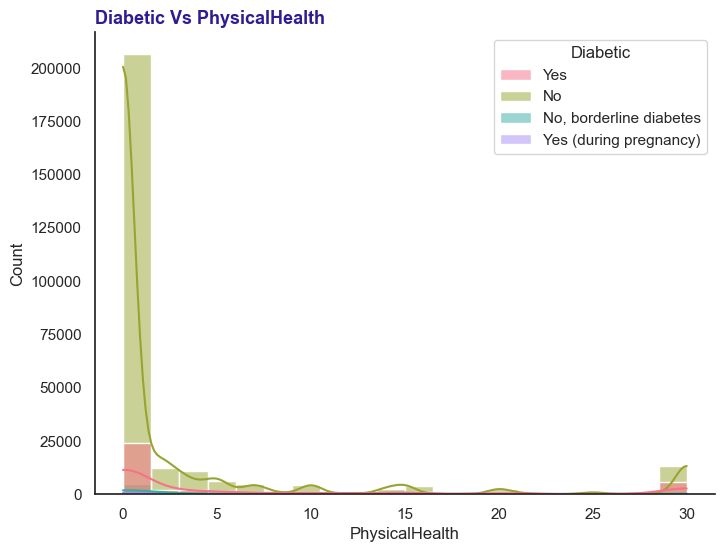

In [15]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=data['PhysicalHealth'],hue = data['Diabetic'],bins=20,palette= 'husl',stat='count',multiple='layer',kde=True)
# plt.xticks()
plt.title('Diabetic Vs PhysicalHealth',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()

In [38]:
from scipy.stats import ttest_ind

# Tách dữ liệu thành hai nhóm theo giá trị của biến Asthma và loại bỏ các giá trị thiếu
asthma_yes = data[data['Diabetic'] == 'Yes']['PhysicalHealth'].dropna()
asthma_no = data[data['Diabetic'] == 'No, borderline diabetes']['PhysicalHealth'].dropna()

# Thực hiện kiểm định Welch's t-test độc lập
test_result = ttest_ind(asthma_yes, asthma_no)

# In ra kết quả
print('Giá trị t =', test_result.statistic)
print('p-value =', test_result.pvalue)

# Đưa ra kết luận
if test_result.pvalue < 0.05:
    print('Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')
else:
    print('Không có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')

Giá trị t = 15.357692215244464
p-value = 4.220036182668062e-53
Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.


In [46]:

# Chọn giá trị p[c] và kích thước mẫu chuẩn hóa
pc = 0.01
c = 319795/25

# Tách dữ liệu thành hai nhóm theo giá trị của biến Asthma và loại bỏ các giá trị thiếu
asthma_yes = data[data['Diabetic'] == 'Yes']['PhysicalHealth'].dropna()
asthma_no = data[data['Diabetic'] == 'No, borderline diabetes']['PhysicalHealth'].dropna()

# Thực hiện kiểm định Welch's t-test độc lập
test_result = ttest_ind(asthma_yes, asthma_no)

# Tính p-value chuẩn hóa
p_std = pc * np.sqrt(c/len(asthma_yes))

# In ra kết quả
print('Giá trị t =', test_result.statistic)
print('p-value =', test_result.pvalue)
print('p-value chuẩn hóa =', p_std)

# Đưa ra kết luận
if p_std < 0.05:
    print('Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')
else:
    print('Không có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.')

Giá trị t = 15.357692215244464
p-value = 4.220036182668062e-53
p-value chuẩn hóa = 0.005599188706489002
Có sự khác biệt đáng kể giữa hai nhóm về mặt sức khỏe.


## Impact by BMI

In [49]:
yes_data = ana_data[ana_data['Diabetic'] == 'Yes']
no_data = ana_data[ana_data['Diabetic'] == 'No']
borderline_data = ana_data[ana_data['Diabetic'] == 'No, borderline diabetes']
pregnant_data = ana_data[ana_data['Diabetic'] == 'Yes (during pregnancy)']

In [50]:
yes_counts = yes_data['BMI Category'].value_counts()
no_counts = no_data['BMI Category'].value_counts()
borderline_counts = borderline_data['BMI Category'].value_counts()
pregnant_counts = pregnant_data['BMI Category'].value_counts()

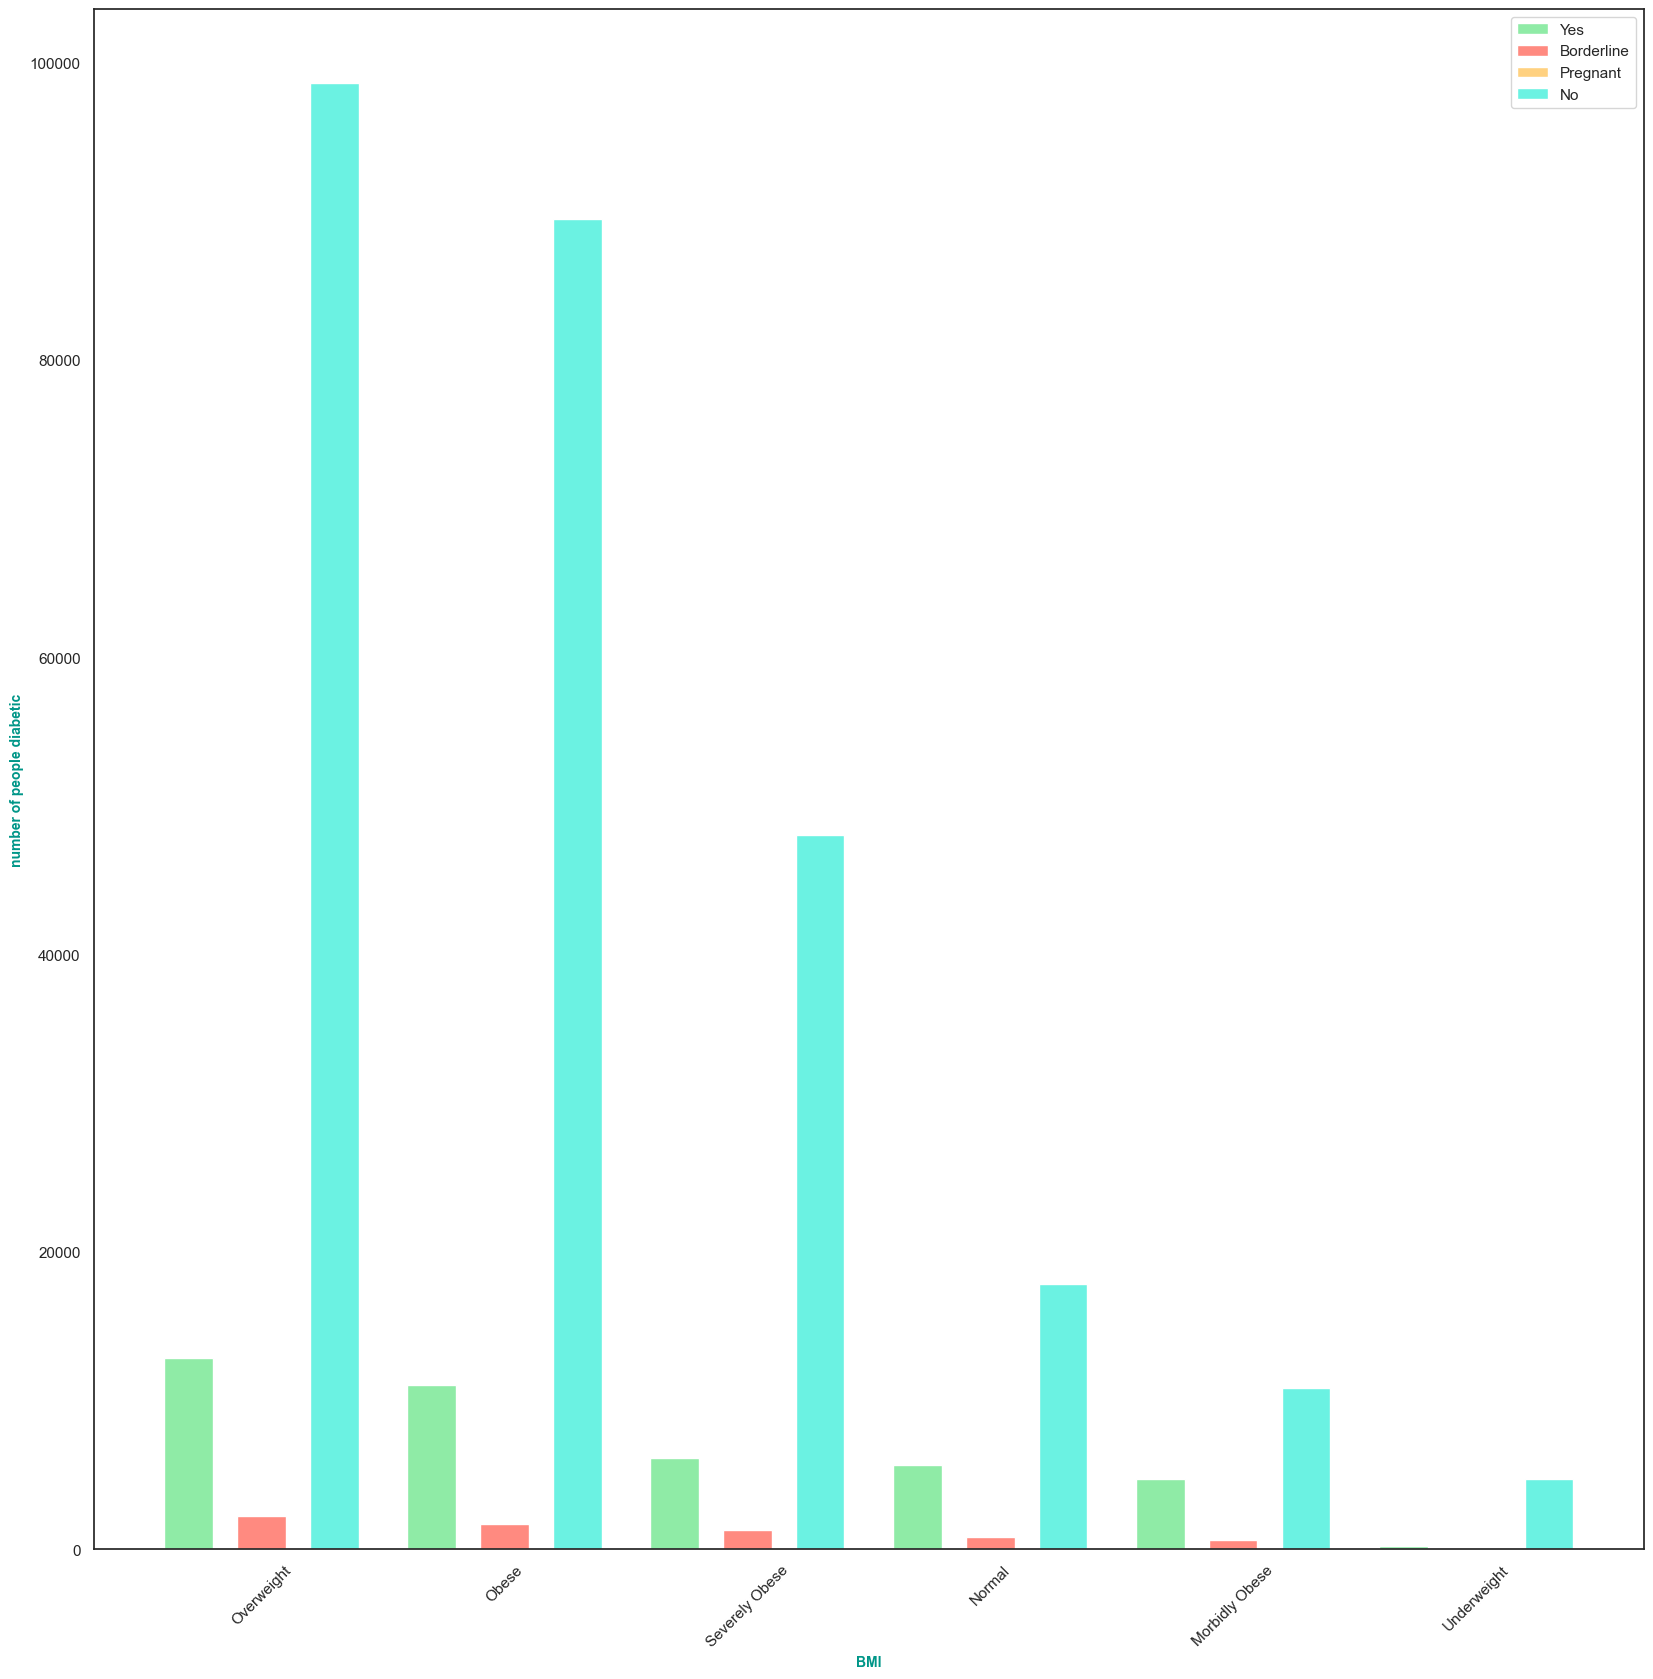

In [68]:

yes_counts = yes_data['BMI Category'].value_counts()
no_counts = no_data['BMI Category'].value_counts()
borderline_counts = borderline_data['BMI Category'].value_counts()
pregnant_counts = pregnant_data['BMI Category'].value_counts()

bar_width = 0.2
index = np.arange(len(yes_counts.index))
index_2 = index + bar_width * 1.5

colors = ['#8feba6', '#6bf2e2', '#ff8a80', '#ffd180', '#a7ffeb']
plt.figure(figsize=(20,20))
plt.bar(index, yes_counts.values, bar_width, color='#8feba6', label='Yes')
plt.bar(index_2, borderline_counts.values, bar_width, color='#ff8a80', label='Borderline')
plt.bar(index_2+ bar_width * 1.5, pregnant_counts.values, bar_width, color='#ffd180', label='Pregnant')
plt.bar(index_2+ bar_width * 1.5, no_counts.values, bar_width, color='#6bf2e2', label='No')

plt.xticks(index + bar_width * 1.5 , yes_counts.index)
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('BMI', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
plt.ylabel('number of people diabetic', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})

plt.show()

cột Yes (during pregnancy) xuất hiện rất ít và gần như là không có

## Impact by age

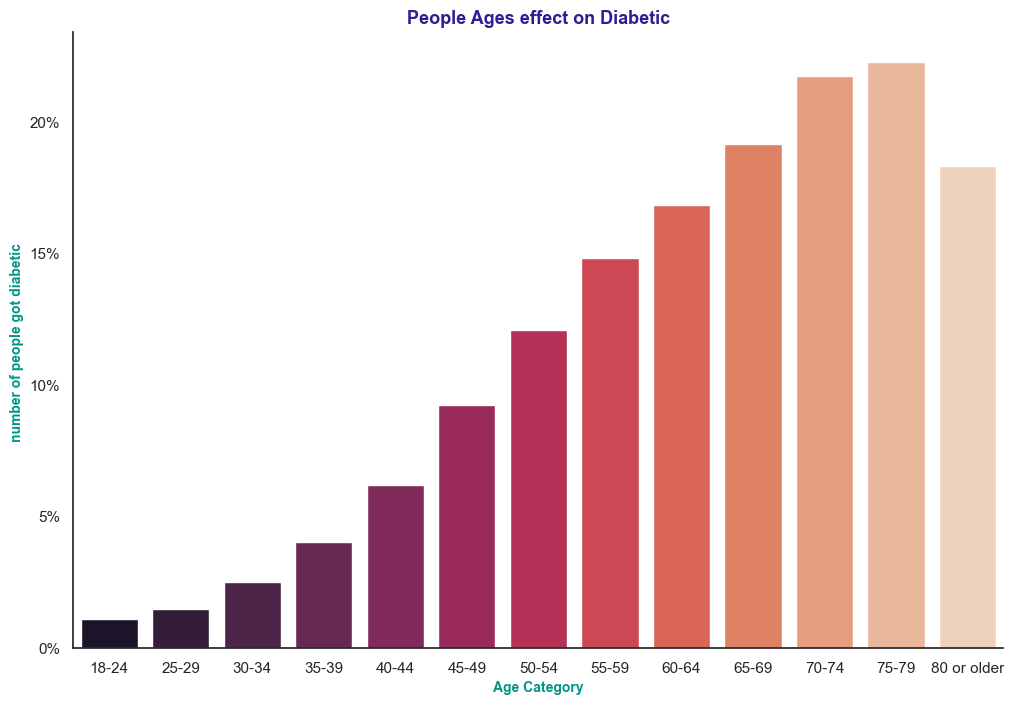

In [51]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['Diabetic']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='rocket')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People Ages effect on Diabetic', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Age Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people got diabetic ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact on heart disease

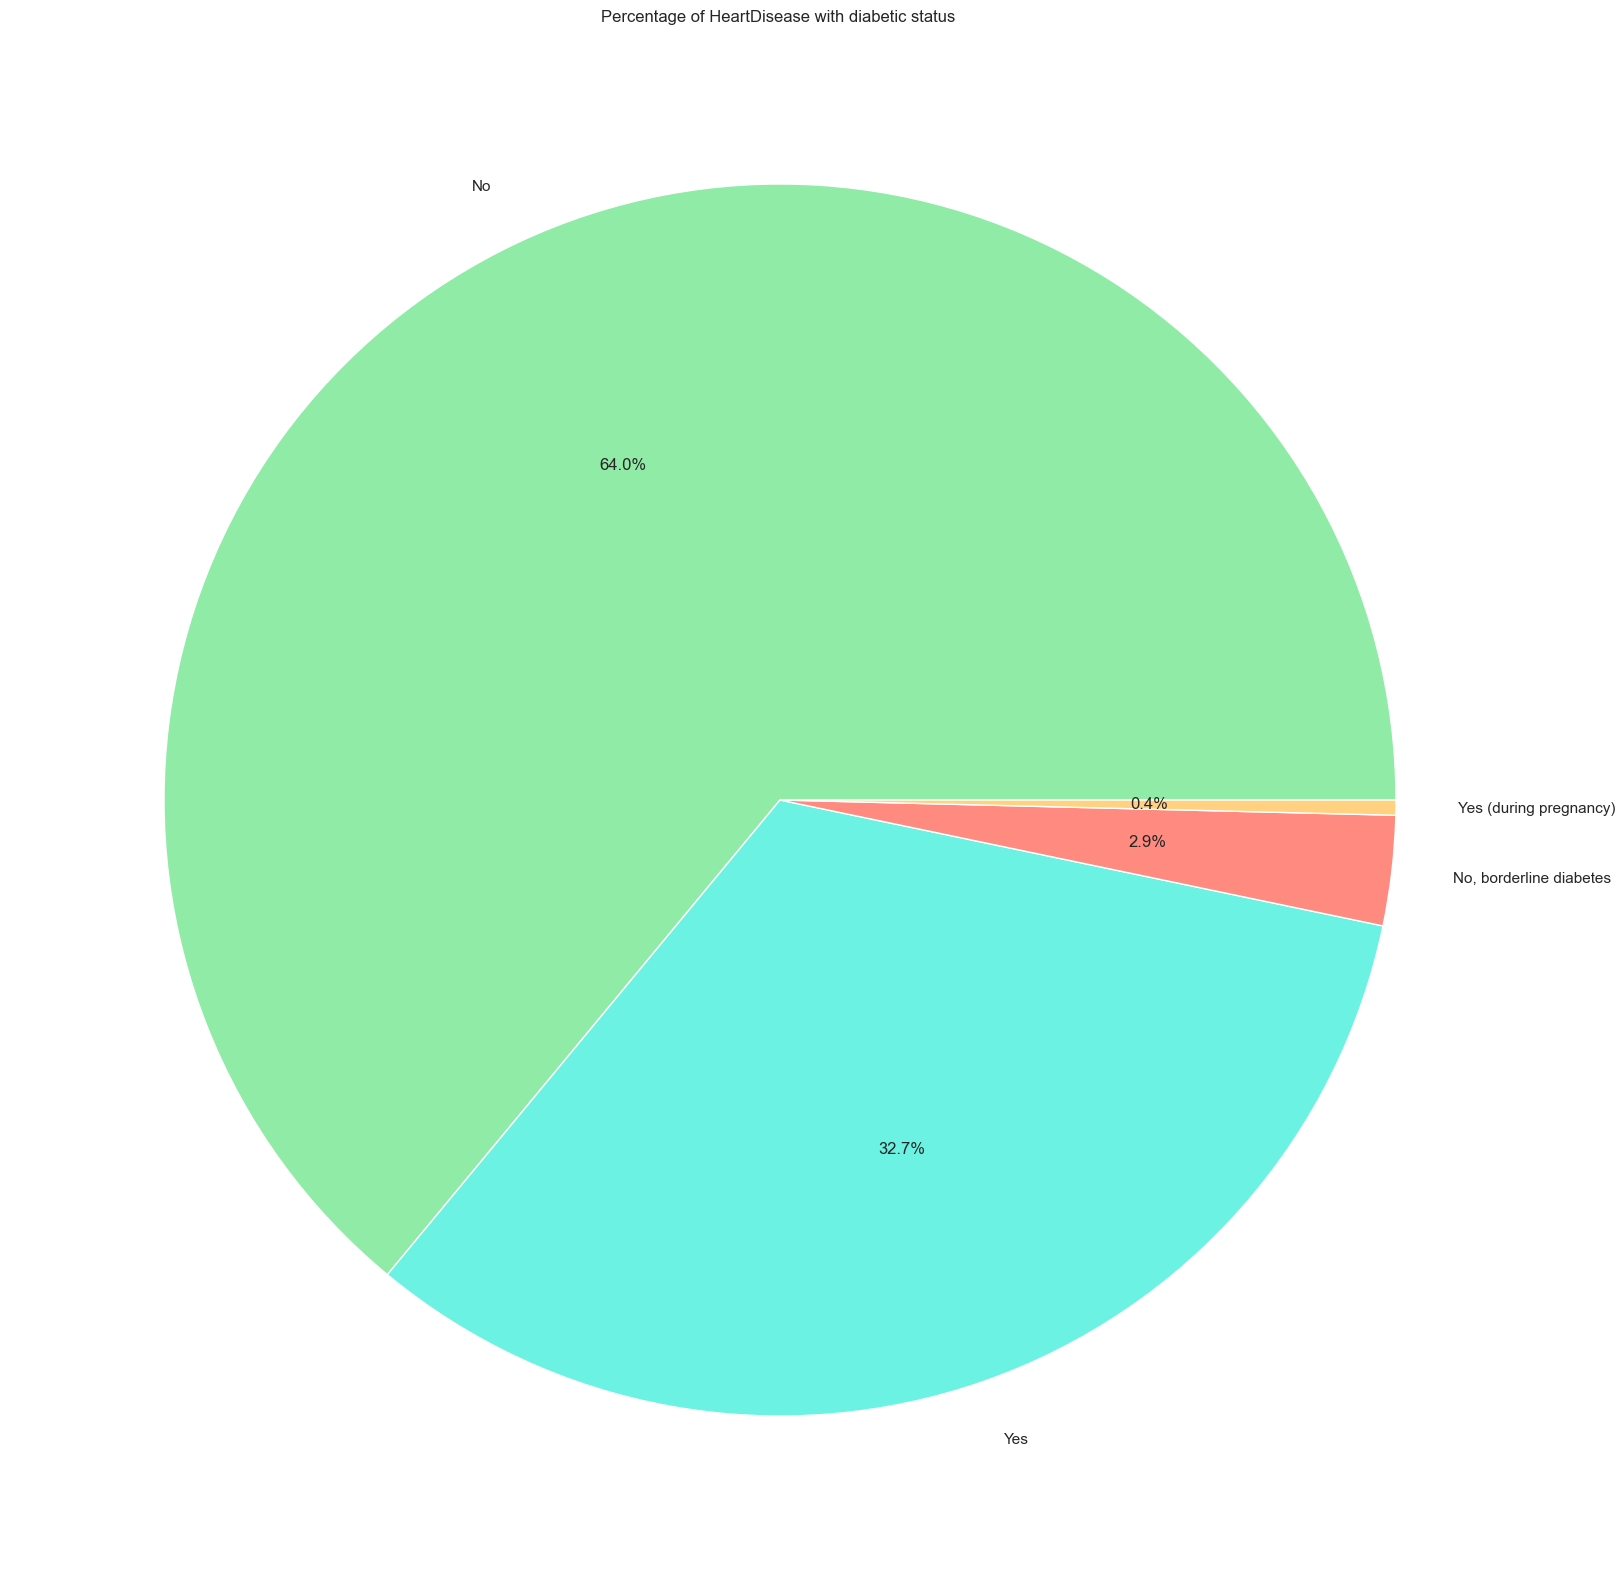

In [69]:
data = ana_data.loc[ana_data['HeartDisease'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['Diabetic'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(20,20))
colors = ['#8feba6', '#6bf2e2', '#ff8a80', '#ffd180', '#a7ffeb']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of HeartDisease with diabetic status ')
plt.show()

# SkinCancer

## Impact by age

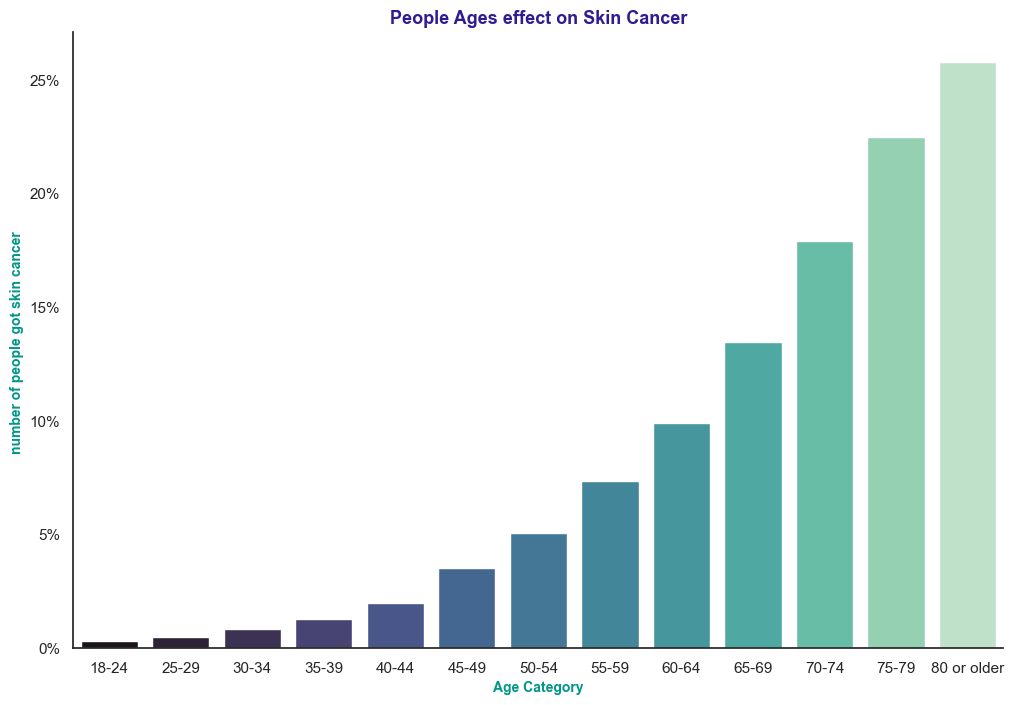

In [6]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['SkinCancer']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People Ages effect on Skin Cancer', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Age Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people got skin cancer ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by race

In [52]:
race_cnt=ana_data['Race'].value_counts()

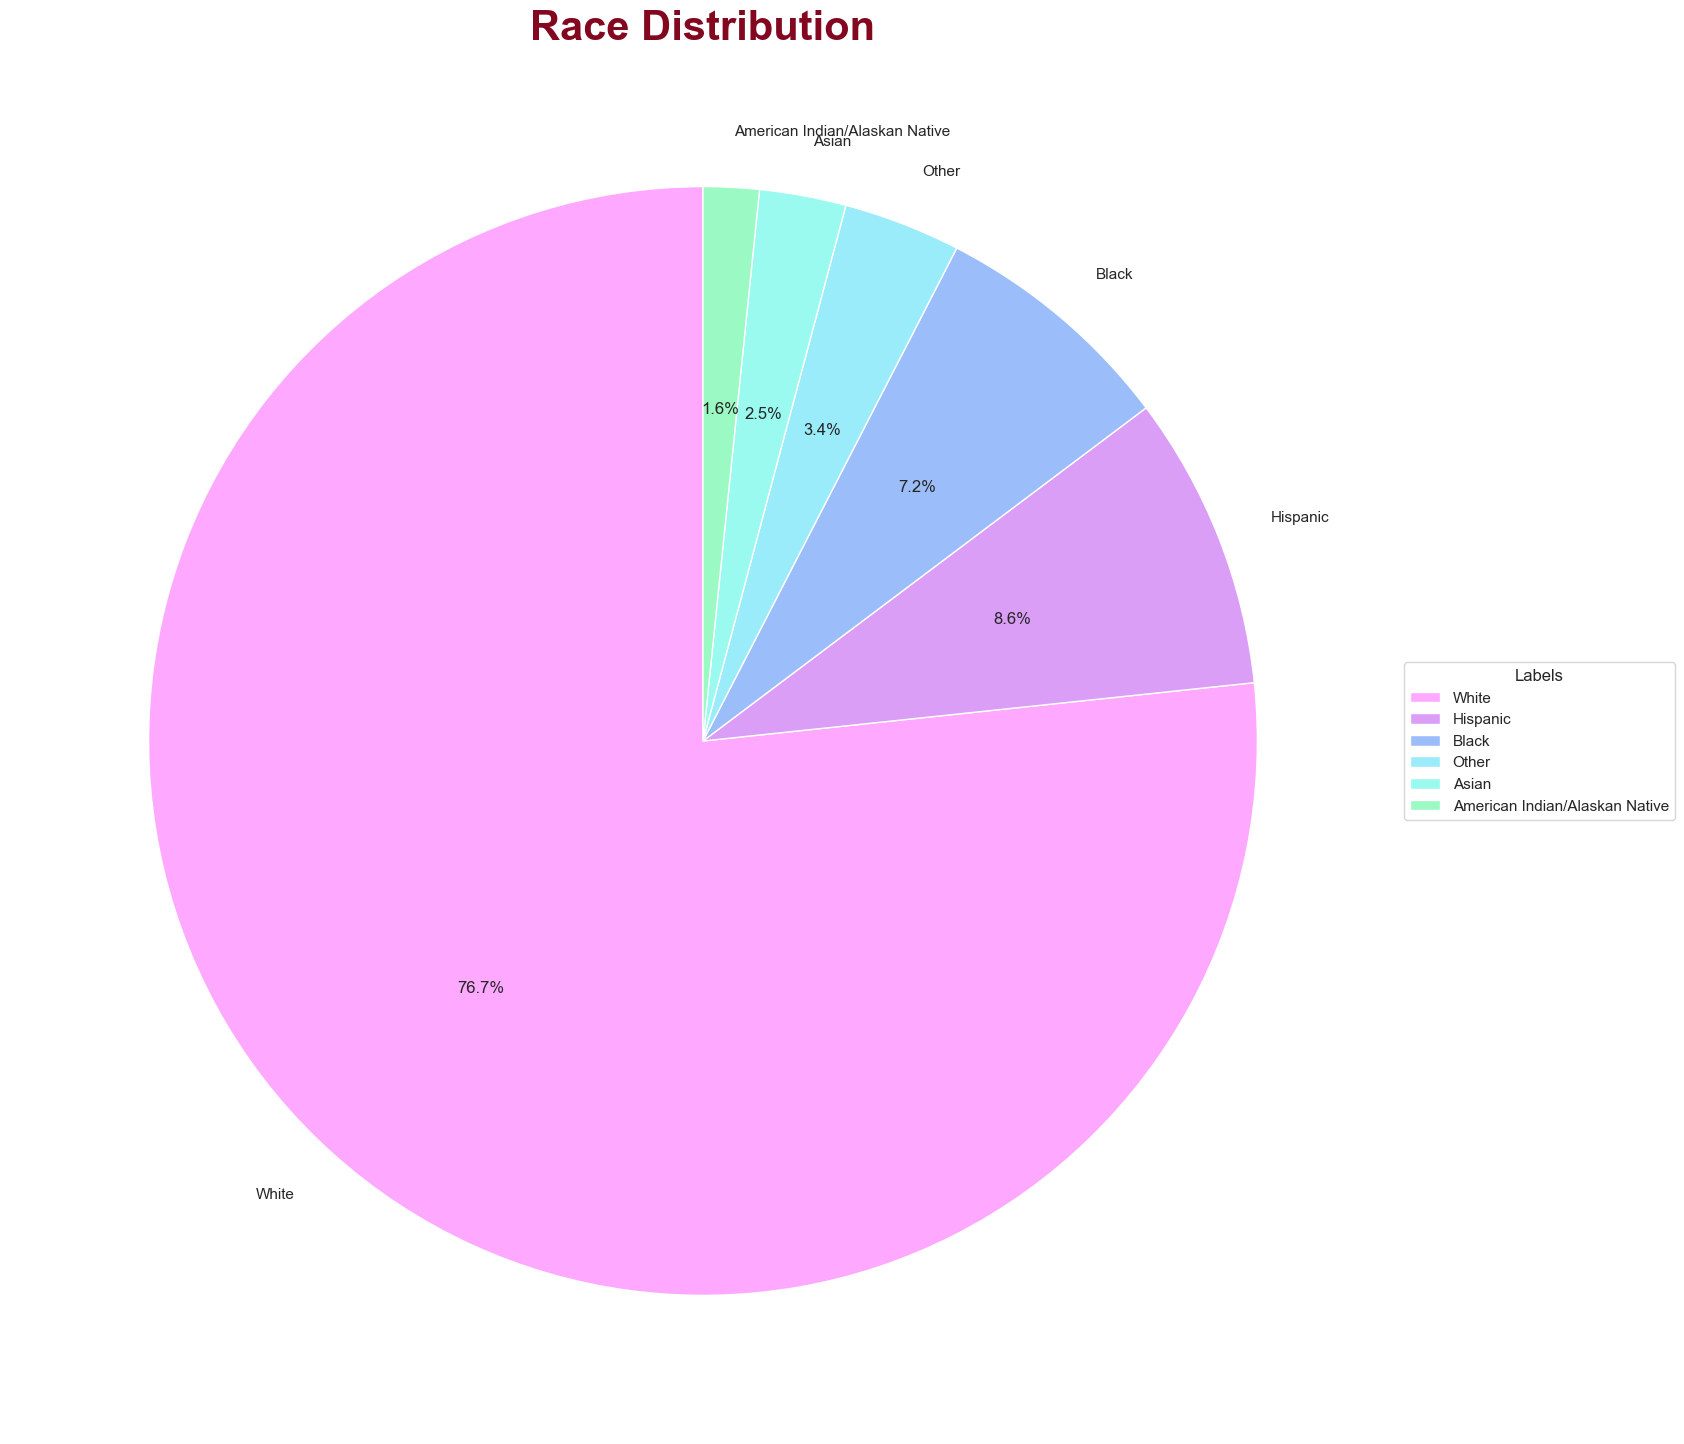

In [53]:
race_dist = pd.DataFrame(race_cnt)
race_dist['percentage'] = race_dist['count'].apply(lambda x: round((x/race_dist['count'].sum())*100),2)
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(18,18))
ax.pie(race_dist['count'], labels=race_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('Race Distribution' ,loc='center', fontsize=30, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(race_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

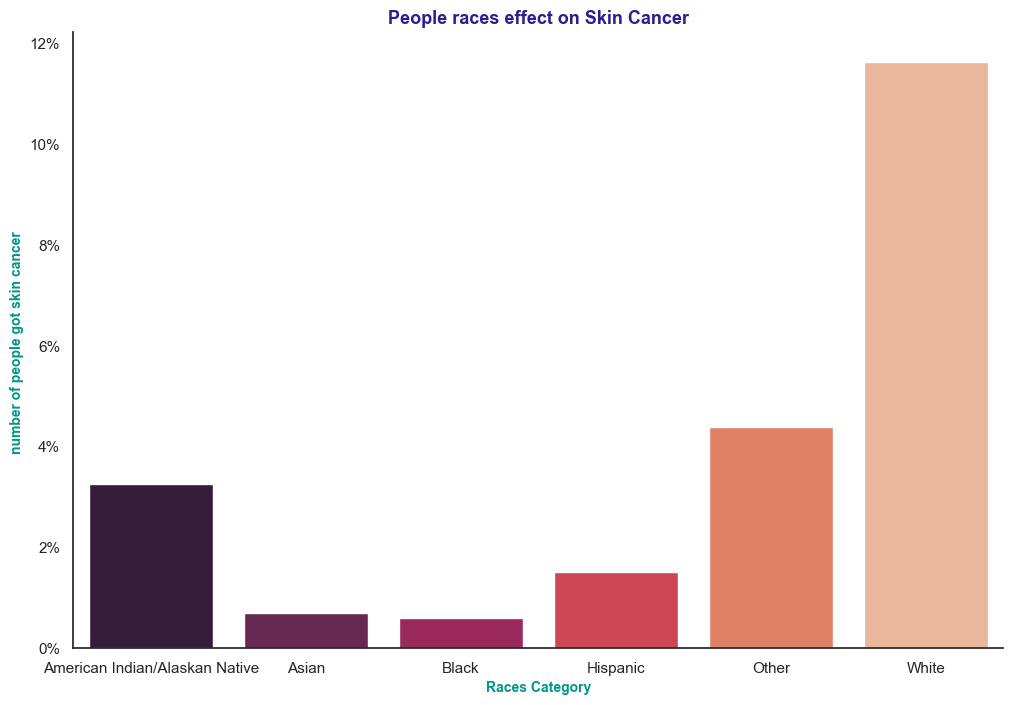

In [7]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'Race'
t = pd.DataFrame((ana_data[ana_data['SkinCancer']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette="rocket")
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People races effect on Skin Cancer', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Races Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people got skin cancer ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact on heart disease

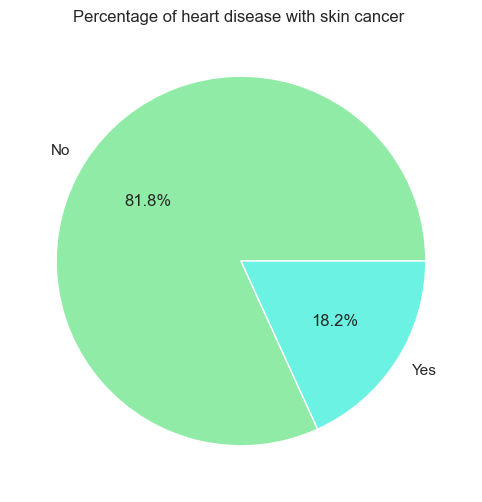

In [8]:
data = ana_data.loc[ana_data['HeartDisease'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['SkinCancer'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#8feba6', '#6bf2e2']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of heart disease with skin cancer ')
plt.show()

# Kidney Disease

## Impact by Diff Walking

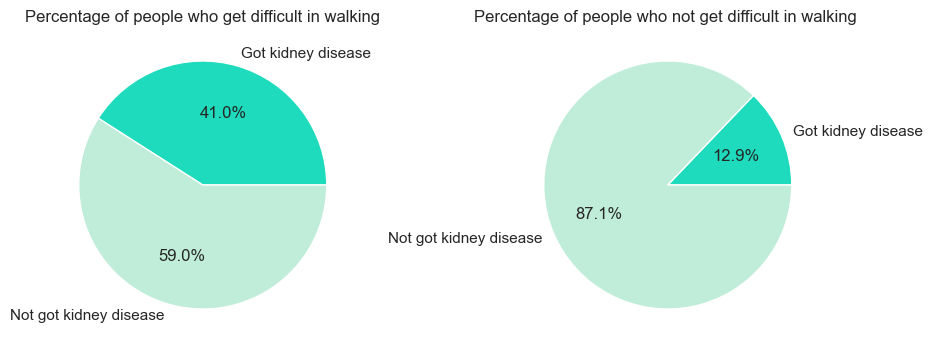

In [16]:
# Tính toán số lượng người trong các nhóm tương ứng
diffWalking_counts = ana_data['KidneyDisease'].value_counts()
diffWalking_kidney_counts = ana_data.groupby(['KidneyDisease', 'DiffWalking'])['AgeCategory'].count()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
kidney_percent = diffWalking_kidney_counts.loc[('Yes', 'Yes')] / diffWalking_counts.loc['Yes'] * 100
not_gotkidney_percent = diffWalking_kidney_counts.loc[('Yes', 'No')] / diffWalking_counts.loc['Yes'] * 100

# Tính toán phần trăm những người không hoạt động có hút thuốc và không hút thuốc
inactive_smoker_percent = diffWalking_kidney_counts.loc[('No', 'Yes')] / diffWalking_counts.loc['No'] * 100
inactive_non_smoker_percent = diffWalking_kidney_counts.loc[('No', 'No')] / diffWalking_counts.loc['No'] * 100

# Vẽ biểu đồ tròn
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.5)
# Biểu đồ tròn cho phần trăm những người hoạt động có hút thuốc và không hút thuốc
labels = ['Got kidney disease', 'Not got kidney disease']
sizes = [kidney_percent, not_gotkidney_percent]
axs[0].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#1ddbbc','#c0edd9'])
axs[0].set_title('Percentage of people who get difficult in walking')

# Biểu đồ tròn cho phần trăm những người không hoạt động có hút thuốc và không hút thuốc
labels = ['Got kidney disease', 'Not got kidney disease']
sizes = [inactive_smoker_percent, inactive_non_smoker_percent]
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors=['#1ddbbc','#c0edd9'])
axs[1].set_title('Percentage of people who not get difficult in walking ')

plt.show()

## Impact by Diabetic

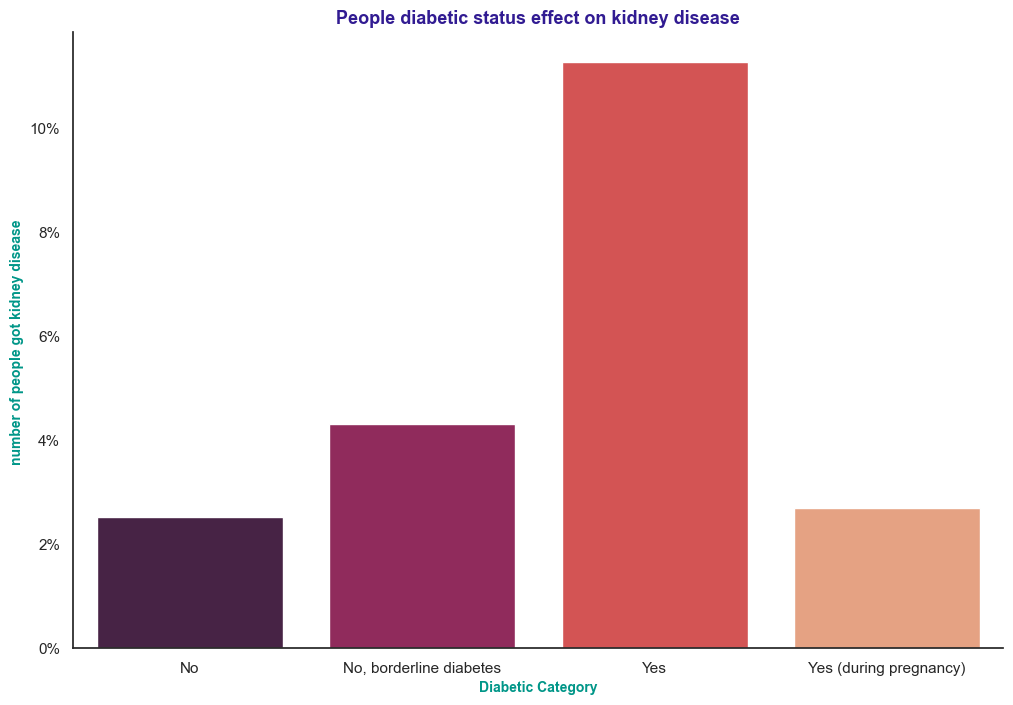

In [17]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'Diabetic'
t = pd.DataFrame((ana_data[ana_data['KidneyDisease']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette="rocket")
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People diabetic status effect on kidney disease', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Diabetic Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people got kidney disease ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact on HeartDisease 

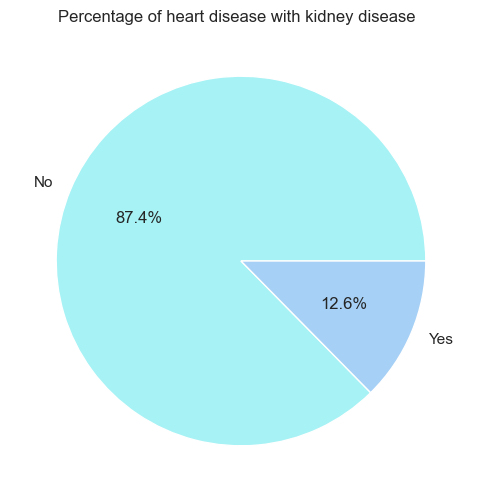

In [22]:
data = ana_data.loc[ana_data['HeartDisease'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['KidneyDisease'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#a6f2f5', '#a6d0f5']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of heart disease with kidney disease  ')
plt.show()

# Stroke

## Impact by diff walking   

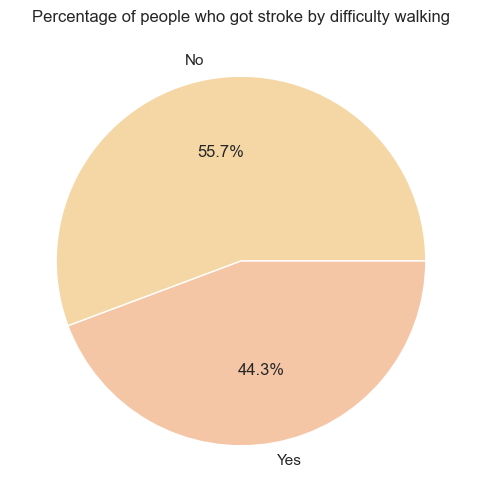

In [54]:
data = ana_data.loc[ana_data['Stroke'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['DiffWalking'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#f5d7a6', '#f5c6a6']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of people who got stroke by difficulty walking')
plt.show()

## Impact by AgeCategory

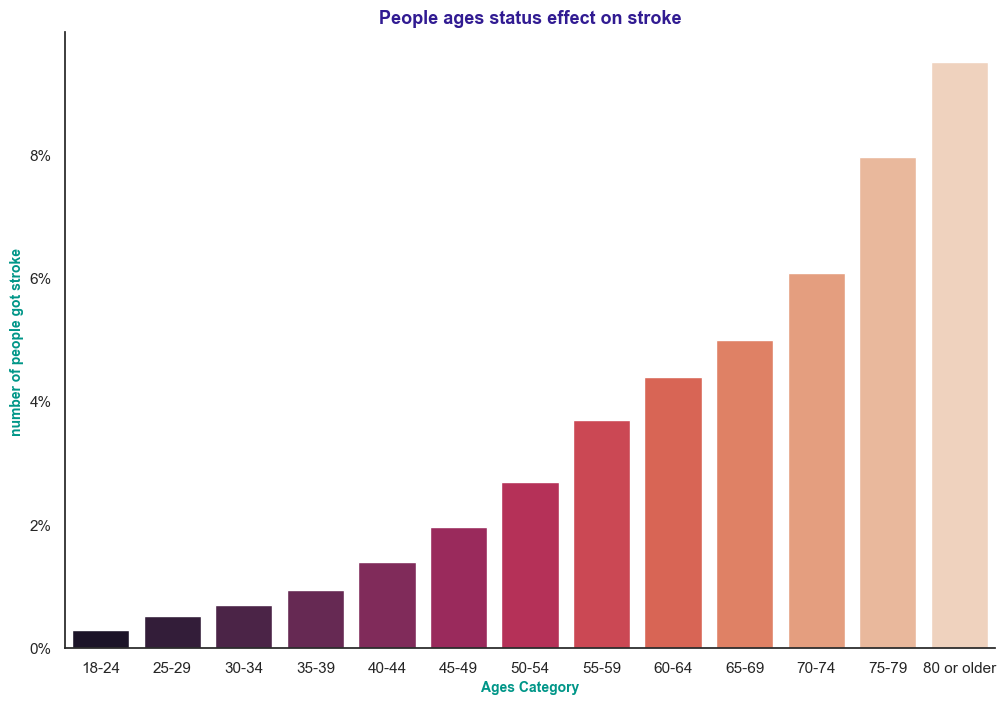

In [27]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['Stroke']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette="rocket")
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People ages status effect on stroke', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Ages Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people got stroke ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by PhysicalHealth

In [56]:
ana_data["Stroke"]

0          No
1         Yes
2          No
3          No
4          No
         ... 
319790     No
319791     No
319792     No
319793     No
319794     No
Name: Stroke, Length: 319795, dtype: object

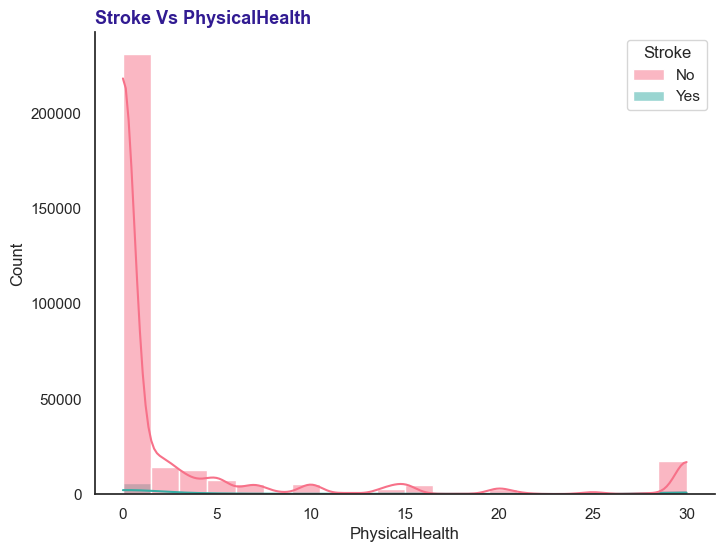

In [70]:
sns.set()
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.histplot(x=ana_data['PhysicalHealth'],hue = ana_data['Stroke'],bins=20,palette= 'husl',stat='count',multiple='layer',kde=True)
# plt.xticks()
plt.title('Stroke Vs PhysicalHealth',loc='left',fontsize=13,fontweight='bold',fontdict={'color':'#311B92'})
sns.despine()
plt.show()

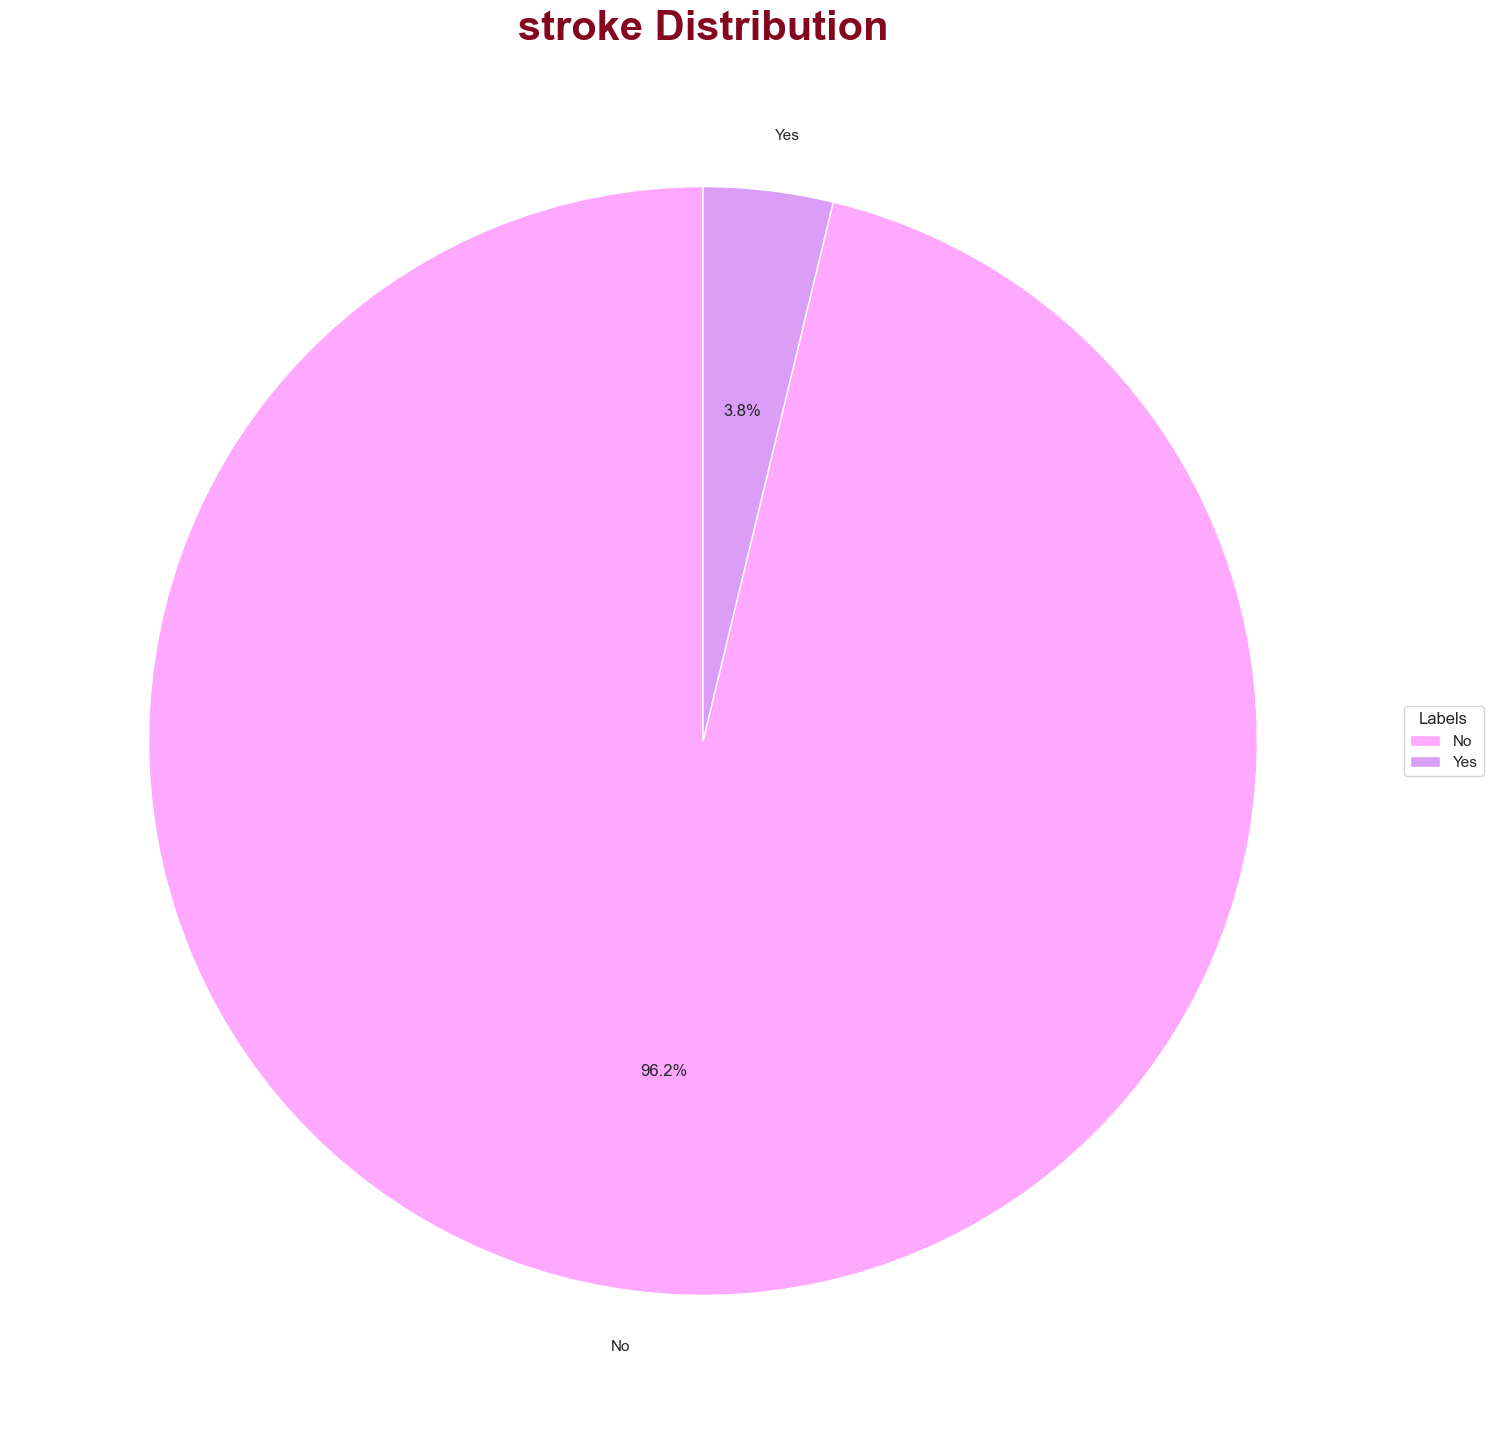

In [71]:
race_cnt=ana_data['Stroke'].value_counts()
race_dist = pd.DataFrame(race_cnt)
race_dist['percentage'] = race_dist['count'].apply(lambda x: round((x/race_dist['count'].sum())*100),2)
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(18,18))
ax.pie(race_dist['count'], labels=race_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('stroke Distribution' ,loc='center', fontsize=30, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(race_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

## Impact on heart disease

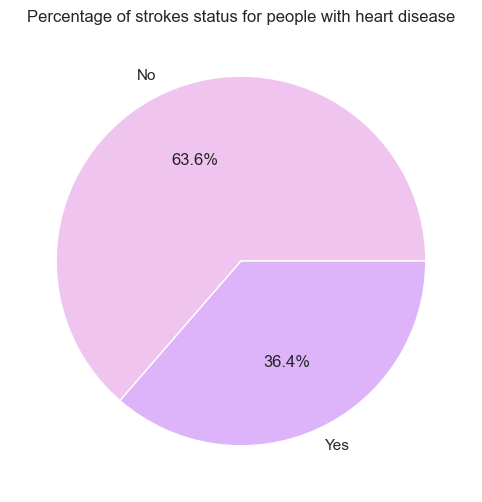

In [73]:
data = ana_data.loc[ana_data['Stroke'] == 'Yes']

# Tính toán số lượng người trong các nhóm tương ứng
counts = data['HeartDisease'].value_counts()

# Tính toán phần trăm những người hoạt động có hút thuốc và không hút thuốc
percentages = counts / counts.sum() * 100

# Vẽ biểu đồ tròn bằng Matplotlib
plt.figure(figsize=(8,6))
colors = ['#efc5f0', '#ddb4fa']
sns.set_palette(sns.color_palette(colors))
plt.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of strokes status for people with heart disease')
plt.show()

## Splitting data into train and test

In [251]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

11    15649
12    15995
13    16195
14    16199
15    16800
Name: car_price, dtype: int64

In [252]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.4 , random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.4, random_state = 42)
print(X_train.shape)
print(y_val.shape)


(138303, 15)
(92202,)


In [253]:
X_train.head()

,car_title,car_sub_title,car_attention_grabber,car_seller_location,year,reg,engine_size,transmission,fuel_type,car_type,miles_traveled,power,service,accident_type,finance
538074,1078,275,89951,1319,2018.0,11,0.9,1,2,6,0.9,0.9,0,4,1
140569,275,11290,9184,1289,2019.0,12,1.2,1,2,6,1.2,1.2,3,4,1
317707,709,33108,87416,1698,2019.0,12,1.6,1,2,10,1.6,1.6,3,4,0
680317,1391,39856,38636,210,2010.0,19,1.8,0,2,6,1.8,1.8,0,4,1
548833,1098,15927,33711,20,2020.0,13,1.3,1,2,10,1.3,1.3,0,4,1


# Training the model

Bulding function needed to get metrics for val set

In [254]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {r2_score(y_test,model.predict(X_test) )}')
    print("MAE:" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE:" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))
    



## Basic Linear Regression

In [255]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.6451796947379362
Val score 0.6452665842367873
MAE: 3594.4633826228824
MSE: 31224187.21346982
RMSE: 5587.860700972226


## Lasso

In [256]:
ls = Lasso()
ls.fit(X_train, y_train)
get_metrics(ls)

Train score 0.6451790731663016
Val score 0.6452666200820294
MAE: 3593.757557867542
MSE: 31224184.058315836
RMSE: 5587.860418650043


## Ridge

In [257]:
rd = Ridge()
rd.fit(X_train, y_train)
get_metrics(rd)

Train score 0.645179694555242
Val score 0.6452665981295045
MAE: 3594.4475648544703
MSE: 31224185.990611237
RMSE: 5587.860591551228


## Random forest

In [262]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=8,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.8120074573703373
Val score 0.8038968298777973
MAE: 2632.2732872460815
MSE: 17261306.16670699
RMSE: 4154.672811029406


## Keras model

In [263]:
from tensorflow import keras

Define the neural network model architecture

In [264]:

kr = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Compile the model with appropriate loss function and optimizer

In [265]:
# Compile the model with appropriate loss function and optimizer
kr.compile(loss='mean_squared_error', optimizer='adam')

Define a callback to show the progress (number of epoch)

In [266]:

class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

Train the model on the training data

In [ ]:

kr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

Use the trained model to make predictions on the testing data

In [ ]:

predictions = kr.predict(X_val)

In [ ]:
print(f'Train score {r2_score(y_train,kr.predict(X_train) )}')
print(f'Val score {r2_score(y_val, predictions)}')
print("MAE:" , metrics.mean_absolute_error(y_val,kr.predict(X_val)))
print("MSE:" , metrics.mean_squared_error(y_val,kr.predict(X_val)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,kr.predict(X_val))))